### Model a deep feed forward network for regression

**Data Preprocessing**  

1. Data generation with used polynomials
2. Adding Noisy

In [ ]:
import numpy as np
# Polynomials that calculate target y-values
def polynomials(X):
    y1 = X[:, 0] * X[:, 2] + 1.2 * X[:, 0] * X[:, 4] - X[:, 5] * X[:, 6] * X[:, 7] - 2 * X[:, 0]**2 * X[:, 7] + X[:, 4]
    y2 = X[:, 0] * X[:, 4] * X[:, 5] - X[:, 2] * X[:, 3] - 3 * X[:, 1] * X[:, 2] + 2 * X[:, 1]**2 * X[:, 3] - 2 * X[:, 6] * X[:, 7] - 1
    y3 = 2 * X[:, 2]**2 - X[:, 4] * X[:, 5] - 3 * X[:, 0] * X[:, 3] * X[:, 5] - X[:, 0]**2 * X[:, 1] * X[:, 3] - 1
    y4 = -X[:, 5]**3 + 2 * X[:, 0] * X[:, 2] * X[:, 7] - X[:, 0] * X[:, 3] * X[:, 6] - 2 * X[:, 4]**2 * X[:, 1] * X[:, 3] - X[:, 7]
    y5 = X[:, 0] * X[:, 4] - 3 * X[:, 2] * X[:, 3] * X[:, 7] + X[:, 0] * X[:, 1] * X[:, 3] - 3 * X[:, 5] + X[:, 0]**2 * X[:, 6] + 2
    y6 = X[:, 0]**2 * X[:, 2] * X[:, 5] - X[:, 2] * X[:, 4] * X[:, 6] + X[:, 2] * X[:, 3] + 2.2 * X[:, 3] + X[:, 1]**2 * X[:, 2] - 2.1
    return np.column_stack([y1, y2, y3, y4, y5, y6])

# Data generation

# Random numbers with 1000 rows and 8 columns was created.
N = 1000
# The random.seed function was used to train the model on different training and test sets with the same initial condition.
np.random.seed(0)
X = np.random.rand(N, 8) # Creates a matrix of random numbers between 0 and 1.
Y = polynomials(X) # Target Y-values
# Noise from a normal distribution of the same size as Y was added.
noise = np.random.normal(0, 0.001, Y.shape)
Y_with_noisy = Y + noise

**Model Training**  

1. Build a feed forward network
2. Define your loss function
3. Train your algorithm with SGD
4. Report the training and validation errors
5. Select optimal number of epochs

Train Loss Value: 0.1524, Validation Loss Value: 0.1562


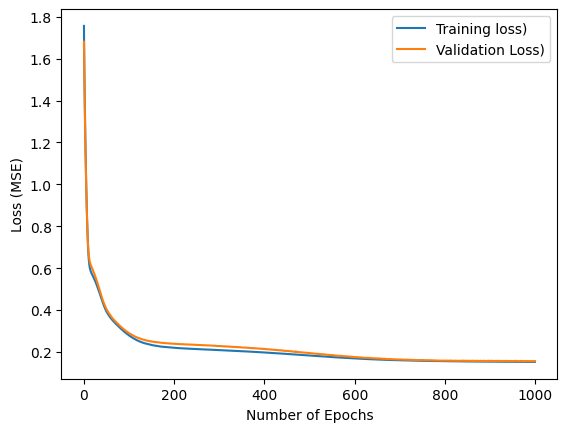

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

model = Sequential() #create a sequential model.
model.add(Input((8,)))
model.add(Dense(6, activation="relu")) # first hidden layer that have 6 nodes and 8 input
model.add(Dense(6, activation="relu")) # second hidden layer
model.add(Dense(6, activation="relu")) # third hidden layer
model.add(Dense(6, activation='linear')) #linear function for output layer
# Stochastic Gradient Descent (SGD) optimization algorithm used for train
optimizer = SGD(learning_rate=0.01)
# when compile model, used Mean Squared Error used for loss funciton and Mean Absolute Error used for evaluate the performance of the model
model.compile(optimizer=optimizer, loss='mse')
# Training the model
train_data = model.fit(X, Y_with_noisy, epochs=1000, validation_split=0.2, verbose=0)
# final training and validation loss of each combination
loss_train = train_data.history['loss'][-1]
loss_validation = train_data.history['val_loss'][-1]

print(f"Train Loss Value: {loss_train:.4f}, Validation Loss Value: {loss_validation:.4f}")

#plot drawn to show train and validation loss values according to epoch numbers.
plt.plot(train_data.history['loss'], label='Training loss)')
plt.plot(train_data.history['val_loss'], label='Validation Loss)')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()


**Optimal Parameters**  

1. Different Activation Funciton
2. Different Learning Rates
3. Increasing Number of Epochs
4. Select Best Parameters

Activation Functions:['relu', 'relu', 'relu'], Learning Rate:0.01, Number of Epochs:200
Train Loss Value: 0.2092, Validation Loss Value: 0.1972


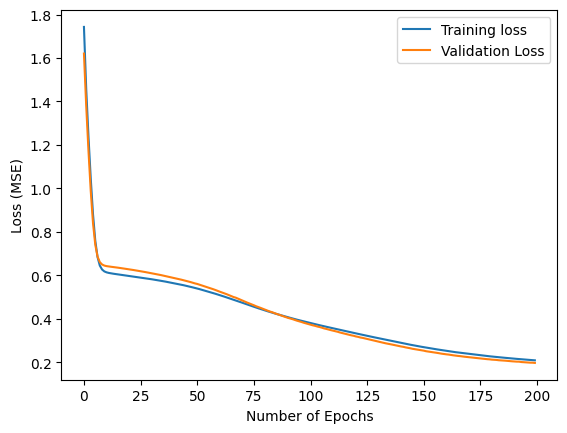

Activation Functions:['relu', 'relu', 'relu'], Learning Rate:0.01, Number of Epochs:300
Train Loss Value: 0.2624, Validation Loss Value: 0.2729


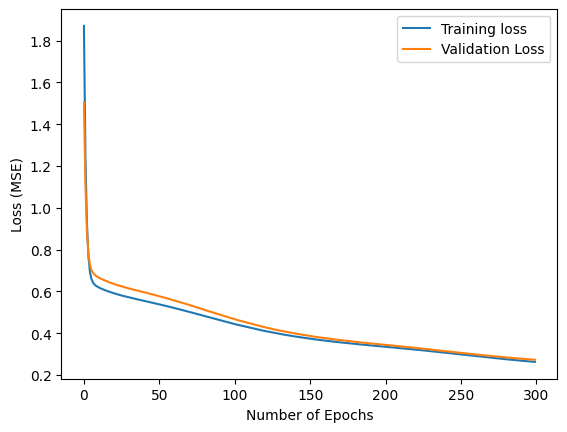

Activation Functions:['relu', 'relu', 'relu'], Learning Rate:0.01, Number of Epochs:450
Train Loss Value: 0.2485, Validation Loss Value: 0.2713


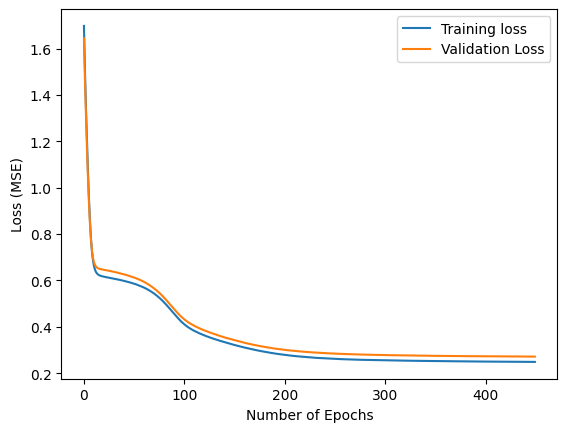

Activation Functions:['relu', 'relu', 'relu'], Learning Rate:0.001, Number of Epochs:200
Train Loss Value: 0.6048, Validation Loss Value: 0.6331


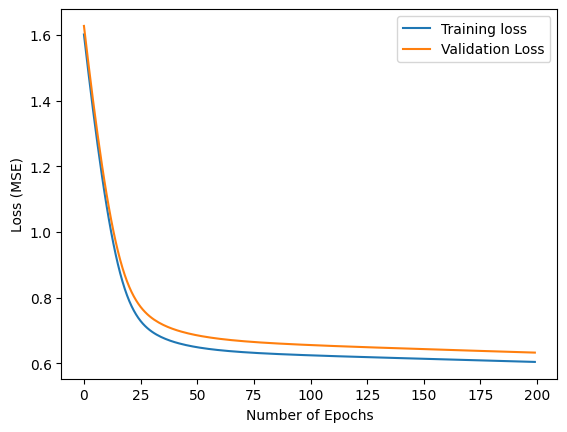

Activation Functions:['relu', 'relu', 'relu'], Learning Rate:0.001, Number of Epochs:300
Train Loss Value: 0.5675, Validation Loss Value: 0.5909


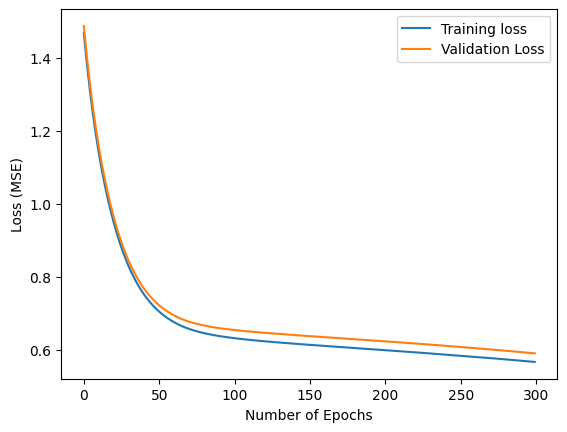

Activation Functions:['relu', 'relu', 'relu'], Learning Rate:0.001, Number of Epochs:450
Train Loss Value: 0.4143, Validation Loss Value: 0.4176


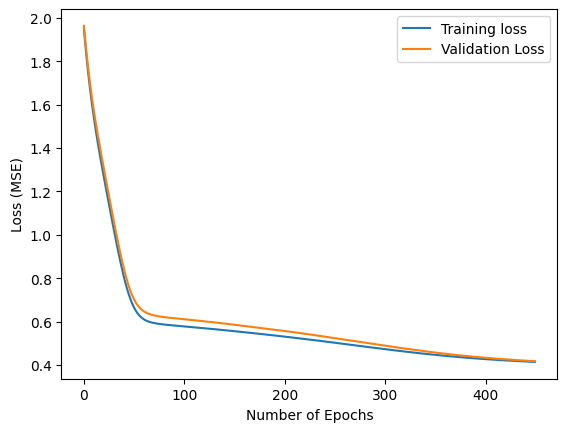

Activation Functions:['relu', 'relu', 'relu'], Learning Rate:0.1, Number of Epochs:200
Train Loss Value: 0.1435, Validation Loss Value: 0.1438


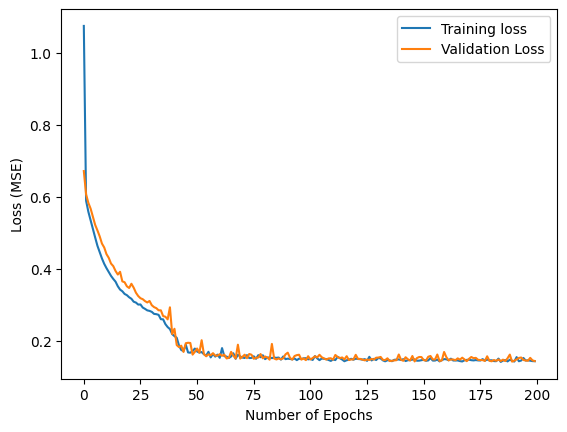

Activation Functions:['relu', 'relu', 'relu'], Learning Rate:0.1, Number of Epochs:300
Train Loss Value: 0.2352, Validation Loss Value: 0.2547


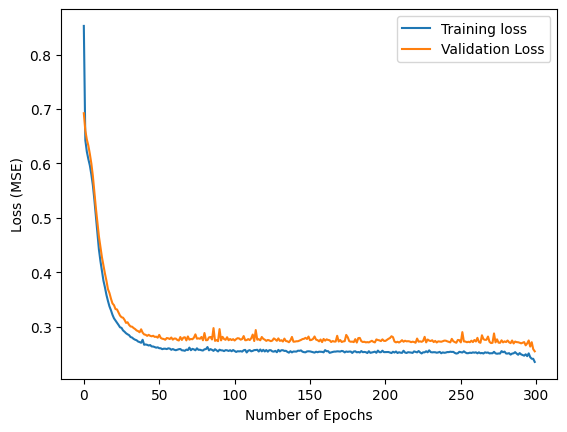

Activation Functions:['relu', 'relu', 'relu'], Learning Rate:0.1, Number of Epochs:450
Train Loss Value: 0.2341, Validation Loss Value: 0.2527


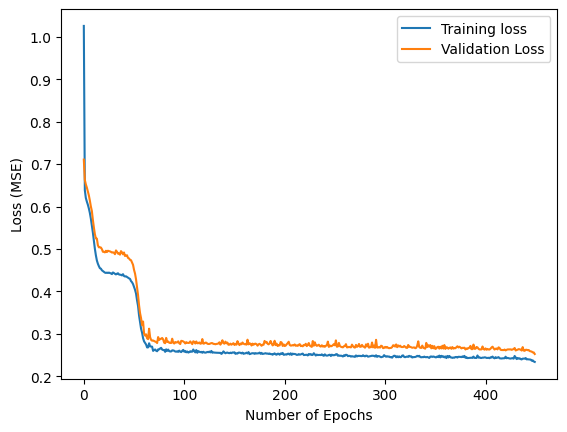

Activation Functions:['tanh', 'relu', 'relu'], Learning Rate:0.01, Number of Epochs:200
Train Loss Value: 0.2686, Validation Loss Value: 0.2906


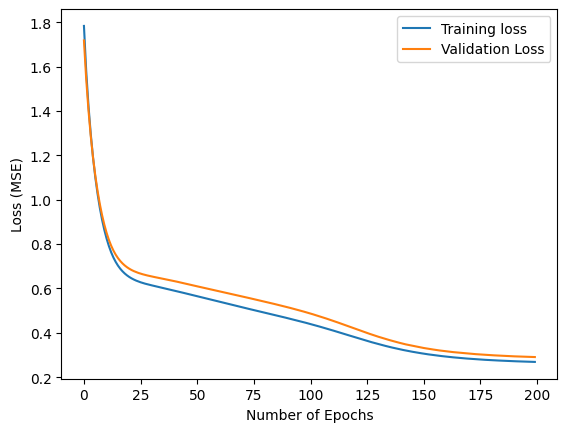

Activation Functions:['tanh', 'relu', 'relu'], Learning Rate:0.01, Number of Epochs:300
Train Loss Value: 0.3749, Validation Loss Value: 0.4155


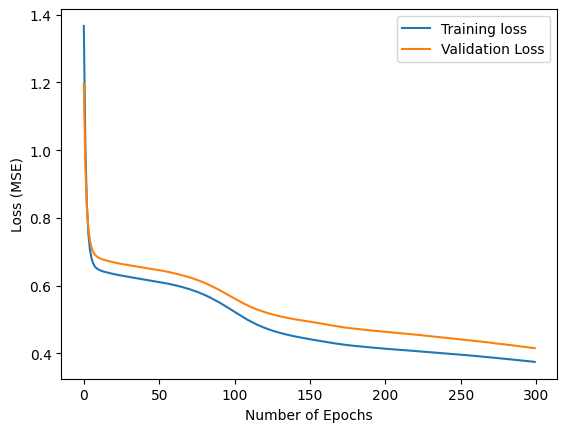

Activation Functions:['tanh', 'relu', 'relu'], Learning Rate:0.01, Number of Epochs:450
Train Loss Value: 0.1462, Validation Loss Value: 0.1524


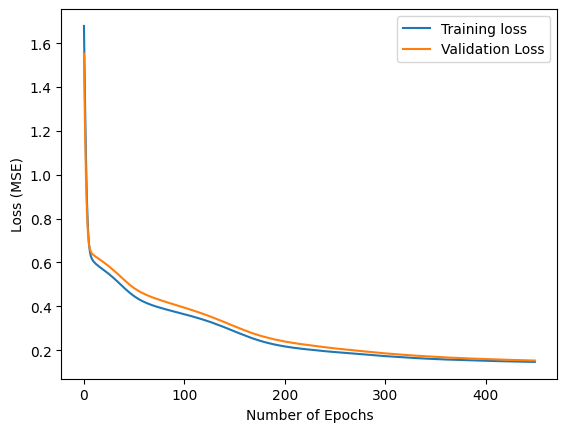

Activation Functions:['tanh', 'relu', 'relu'], Learning Rate:0.001, Number of Epochs:200
Train Loss Value: 0.5253, Validation Loss Value: 0.5718


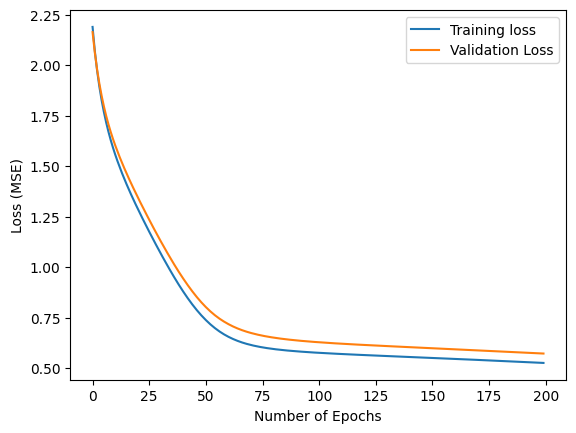

Activation Functions:['tanh', 'relu', 'relu'], Learning Rate:0.001, Number of Epochs:300


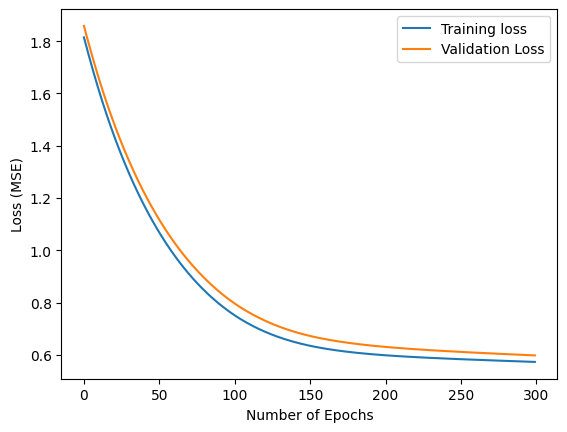

Activation Functions:['tanh', 'relu', 'relu'], Learning Rate:0.001, Number of Epochs:450
Train Loss Value: 0.5431, Validation Loss Value: 0.5669


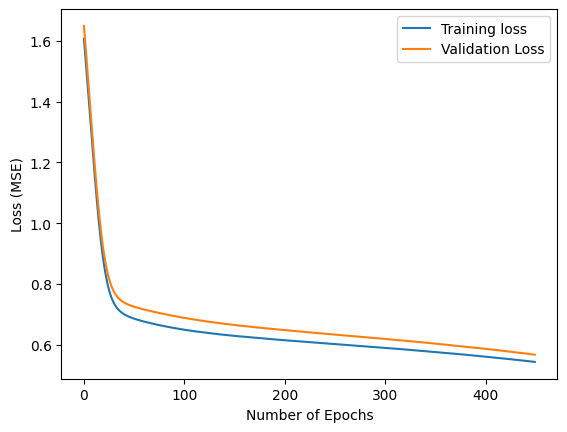

Activation Functions:['tanh', 'relu', 'relu'], Learning Rate:0.1, Number of Epochs:200
Train Loss Value: 0.1486, Validation Loss Value: 0.1460


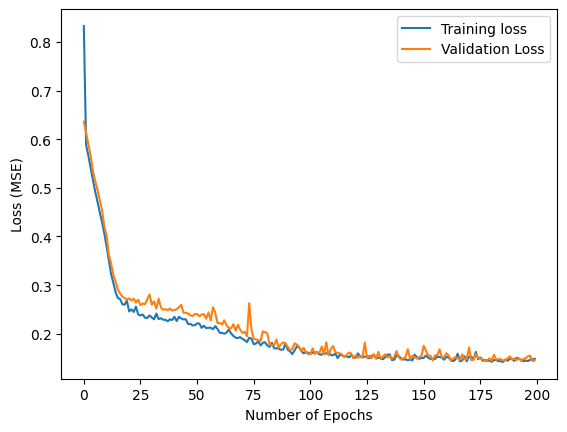

Activation Functions:['tanh', 'relu', 'relu'], Learning Rate:0.1, Number of Epochs:300
Train Loss Value: 0.0915, Validation Loss Value: 0.0945


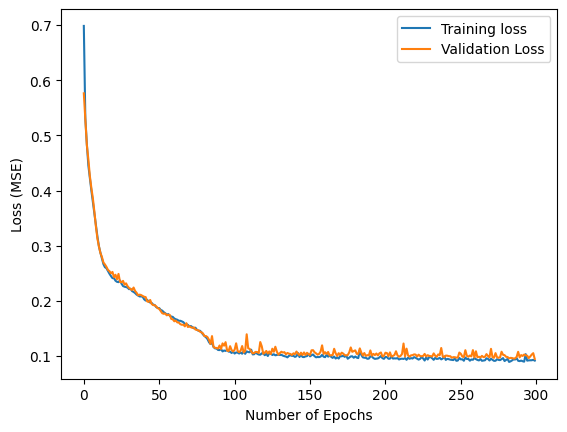

Activation Functions:['tanh', 'relu', 'relu'], Learning Rate:0.1, Number of Epochs:450
Train Loss Value: 0.0953, Validation Loss Value: 0.0933


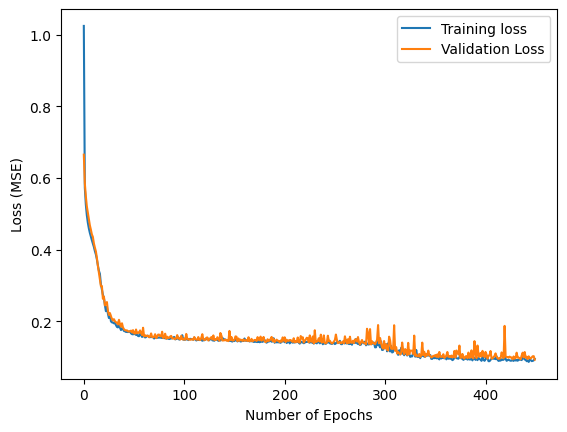

Activation Functions:['relu', 'swish', 'softmax'], Learning Rate:0.01, Number of Epochs:200
Train Loss Value: 0.6011, Validation Loss Value: 0.6397


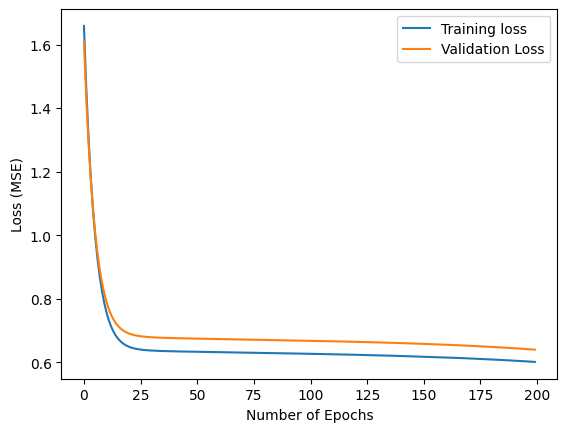

Activation Functions:['relu', 'swish', 'softmax'], Learning Rate:0.01, Number of Epochs:300
Train Loss Value: 0.3960, Validation Loss Value: 0.4155


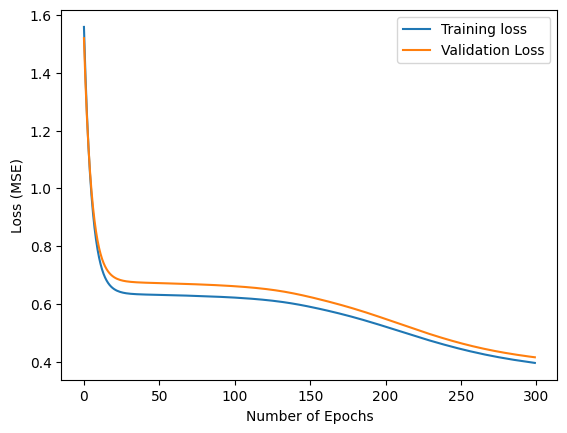

Activation Functions:['relu', 'swish', 'softmax'], Learning Rate:0.01, Number of Epochs:450
Train Loss Value: 0.4045, Validation Loss Value: 0.4268


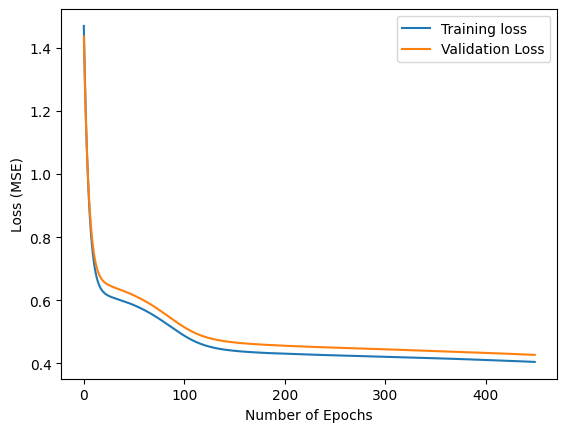

Activation Functions:['relu', 'swish', 'softmax'], Learning Rate:0.001, Number of Epochs:200
Train Loss Value: 0.6513, Validation Loss Value: 0.6941


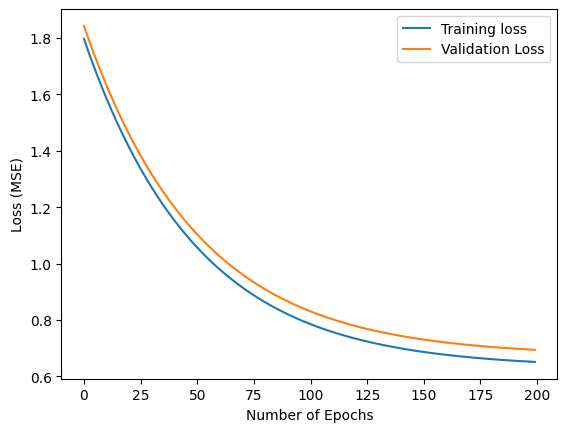

Activation Functions:['relu', 'swish', 'softmax'], Learning Rate:0.001, Number of Epochs:300
Train Loss Value: 0.6293, Validation Loss Value: 0.6705


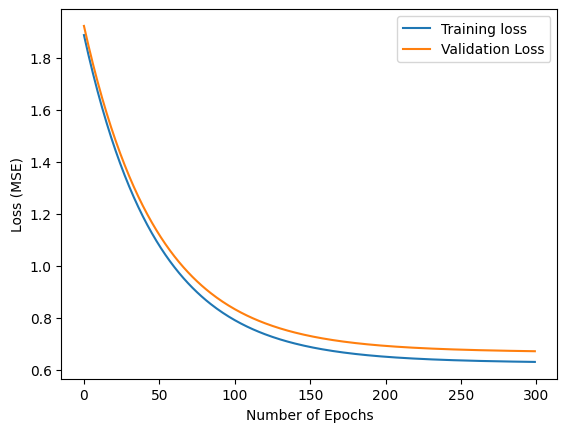

Activation Functions:['relu', 'swish', 'softmax'], Learning Rate:0.001, Number of Epochs:450
Train Loss Value: 0.6334, Validation Loss Value: 0.6740


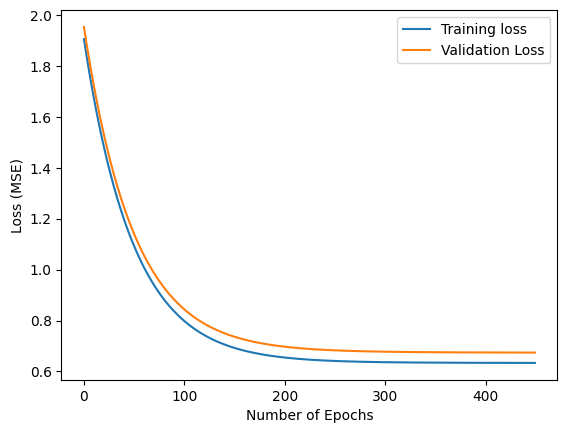

Activation Functions:['relu', 'swish', 'softmax'], Learning Rate:0.1, Number of Epochs:200
Train Loss Value: 0.1959, Validation Loss Value: 0.2002


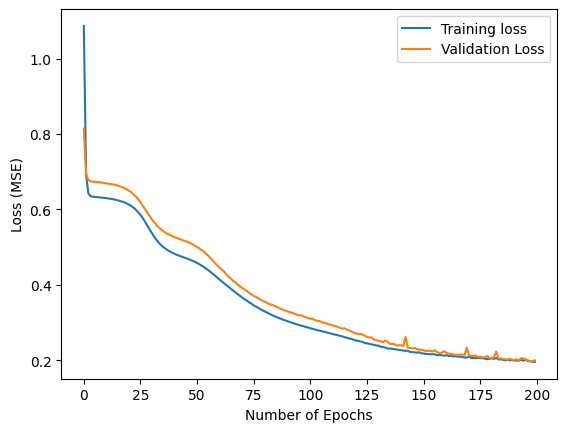

Activation Functions:['relu', 'swish', 'softmax'], Learning Rate:0.1, Number of Epochs:300
Train Loss Value: 0.1781, Validation Loss Value: 0.1851


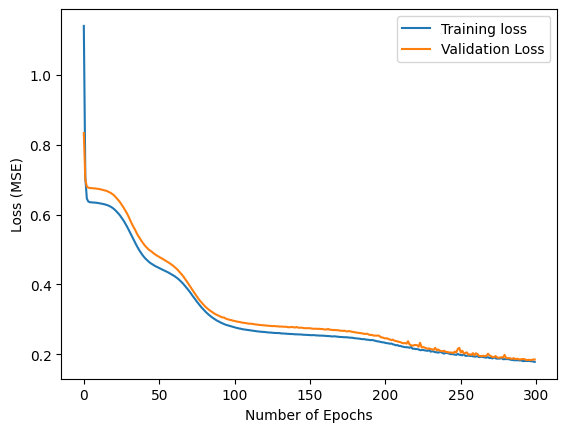

Activation Functions:['relu', 'swish', 'softmax'], Learning Rate:0.1, Number of Epochs:450
Train Loss Value: 0.1658, Validation Loss Value: 0.1708


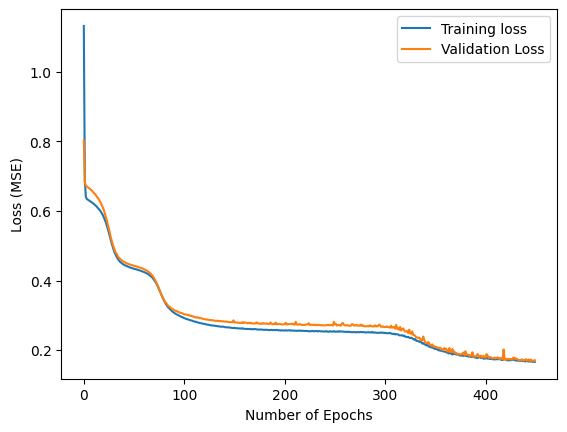

In [ ]:
#combinations of set of activation function and learning rate and number of epochs
activation_functions = [
    ['relu', 'relu', 'relu'],
    ['tanh', 'relu', 'relu'],
    ['relu', 'swish', 'softmax'] ]
learning_rates = [0.01, 0.001, 0.1]
first_epoch = 200

# record all results
all_results = []

# created loops for each combinations
for i in activation_functions:
    for j in learning_rates:
        for k in [first_epoch, int(first_epoch * 1.5), int(first_epoch * 1.5**2)]: # Epoch number increase by 50% in each step
            print(f"Activation Functions:{i}, Learning Rate:{j}, Number of Epochs:{k}")
            model = Sequential() #create a sequential model.
            model.add(Input((8,)))
            model.add(Dense(6, activation=i[0])) # first hidden layer that have 6 nodes and 8 input
            model.add(Dense(6, activation=i[1])) # second hidden layer
            model.add(Dense(6, activation=i[2])) # third hidden layer
            model.add(Dense(6, activation='linear'))  # linear function for output layer
            # Stochastic Gradient Descent (SGD) optimization algorithm used for train
            optimizer = SGD(learning_rate=j)
            # when compile model, used Mean Squared Error used for loss funciton and Mean Absolute Error used for evaluate the performance of the model
            model.compile(optimizer=optimizer, loss='mse')
            # Training the model
            train_data = model.fit(X, Y_with_noisy, epochs=k, validation_split=0.2, verbose=0)
            # final training and validation loss of each combination
            loss_train = train_data.history['loss'][-1]
            loss_validation = train_data.history['val_loss'][-1]
            all_results.append({'activation_functions': i,'learning_rates': j,'epochs_number': k,'train_loss': loss_train,'val_loss': loss_validation})
            print(f"Train Loss Value: {loss_train:.4f}, Validation Loss Value: {loss_validation:.4f}")

            #plot drawn to show train and validation loss values according to epoch numbers.
            plt.plot(train_data.history['loss'], label='Training loss')
            plt.plot(train_data.history['val_loss'], label='Validation Loss')
            plt.xlabel('Number of Epochs')
            plt.ylabel('Loss (MSE)')
            plt.legend()
            plt.show()



**Best Combinasiton**

In [ ]:
# used min function for find best parameter that have lowest validation loss value in all results
best_combination = min(all_results, key=lambda x: x['val_loss'])
print("Best combination of parameters that have lowest validation errors:")
print(f"Activation Combination: {best_combination['activation_functions']}")
print(f"Learning Rate: {best_combination['learning_rates']}")
print(f"Epochs: {best_combination['epochs_number']}")
print(f"Train Loss: {best_combination['train_loss']}")
print(f"Validation Loss: {best_combination['val_loss']}")


Best combination of parameters that have lowest validation errors:
Activation Combination: ['tanh', 'relu', 'relu']
Learning Rate: 0.1
Epochs: 450
Train Loss: 0.09530770033597946
Validation Loss: 0.09325412660837173


**Adding Nodes**  

1. Add new nodes at a time to each hidden layer
2. Draw Bias and Variance Curve

In [ ]:
# created empty lists as needed
train_loss_values = []
val_loss_values = []
number_nodes =[]
# each layer have 6 nodes in initial
initial_nodes = 6
nodes = [initial_nodes] * 3 # 3 hidden layer
#loop generate for repeat times of iteration that adding nodes each layer
for i in range(100):
    adding_nodes = i % 3  #layers are selected sequentially when adding nodes
    nodes[adding_nodes] += 2
    number_nodes.append(sum(nodes))
    model = Sequential()
    model.add(Input((8,)))
    model.add(Dense(nodes[0], activation=best_combination['activation_functions'][0]))
    model.add(Dense(nodes[1], activation=best_combination['activation_functions'][1]))
    model.add(Dense(nodes[2], activation=best_combination['activation_functions'][2]))
    model.add(Dense(6, activation='linear'))
    optimizer = SGD(learning_rate=best_combination['learning_rates'])
    model.compile(optimizer=optimizer, loss='mse')
    train_data_new_nodes = model.fit(X, Y_with_noisy, epochs= best_combination['epochs_number'], validation_split=0.2, verbose=0)
    loss_train_nodes = train_data_new_nodes.history['loss'][-1]
    loss_val_nodes = train_data_new_nodes.history['val_loss'][-1]

    # add loss values lists that generated
    train_loss_values.append(loss_train_nodes)
    val_loss_values.append(loss_val_nodes)

    print(f"Repeat times: {i + 1}, Total Nodes: {sum(nodes)}, Train Loss Value: {loss_train_nodes:.4f}, Validation Loss Value: {loss_val_nodes:.4f}")

Repeat times: 1, Total Nodes: 20, Train Loss Value: 0.0566, Validation Loss Value: 0.0537
Repeat times: 2, Total Nodes: 22, Train Loss Value: 0.0512, Validation Loss Value: 0.0616
Repeat times: 3, Total Nodes: 24, Train Loss Value: 0.0554, Validation Loss Value: 0.0472
Repeat times: 4, Total Nodes: 26, Train Loss Value: 0.0350, Validation Loss Value: 0.0418
Repeat times: 5, Total Nodes: 28, Train Loss Value: 0.0382, Validation Loss Value: 0.0474
Repeat times: 6, Total Nodes: 30, Train Loss Value: 0.0279, Validation Loss Value: 0.0331
Repeat times: 7, Total Nodes: 32, Train Loss Value: 0.0294, Validation Loss Value: 0.0329
Repeat times: 8, Total Nodes: 34, Train Loss Value: 0.0265, Validation Loss Value: 0.0304
Repeat times: 9, Total Nodes: 36, Train Loss Value: 0.0207, Validation Loss Value: 0.0291
Repeat times: 10, Total Nodes: 38, Train Loss Value: 0.0231, Validation Loss Value: 0.0330
Repeat times: 11, Total Nodes: 40, Train Loss Value: 0.0254, Validation Loss Value: 0.0236
Repeat t

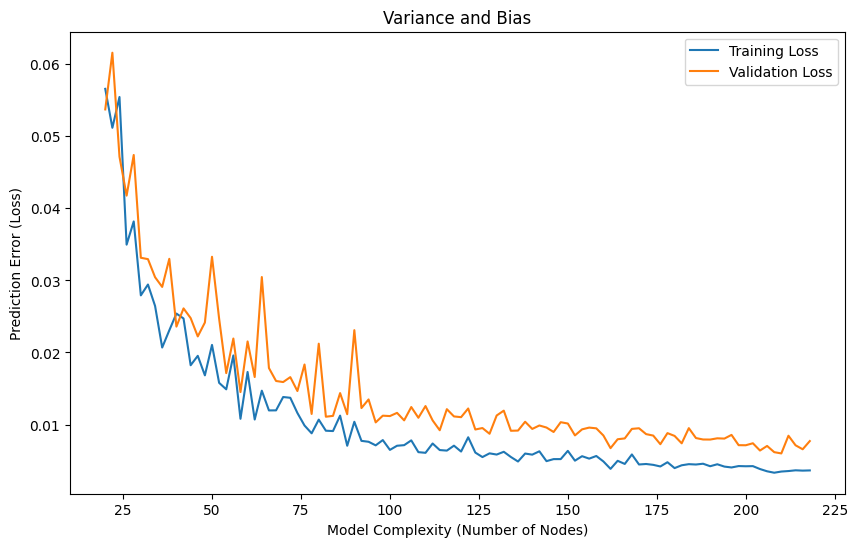

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(number_nodes,train_loss_values, label="Training Loss")
plt.plot(number_nodes, val_loss_values, label="Validation Loss")
plt.xlabel("Model Complexity (Number of Nodes)")
plt.ylabel("Prediction Error (Loss)")
plt.title("Variance and Bias")
plt.legend()
plt.show()

**New Dataset**  

1. Increasing Data Size
2. Training Model
3. Adding Nodes
3. Draw Bias and Variance Curve

Repeat times: 1, Total Nodes: 20, Train Loss Value: 0.0932, Validation Loss Value: 0.1111
Repeat times: 2, Total Nodes: 22, Train Loss Value: 0.0565, Validation Loss Value: 0.0659
Repeat times: 3, Total Nodes: 24, Train Loss Value: 0.0532, Validation Loss Value: 0.0650
Repeat times: 4, Total Nodes: 26, Train Loss Value: 0.0558, Validation Loss Value: 0.0623
Repeat times: 5, Total Nodes: 28, Train Loss Value: 0.0427, Validation Loss Value: 0.0662
Repeat times: 6, Total Nodes: 30, Train Loss Value: 0.0446, Validation Loss Value: 0.0428
Repeat times: 7, Total Nodes: 32, Train Loss Value: 0.0452, Validation Loss Value: 0.0456
Repeat times: 8, Total Nodes: 34, Train Loss Value: 0.0485, Validation Loss Value: 0.0513
Repeat times: 9, Total Nodes: 36, Train Loss Value: 0.0370, Validation Loss Value: 0.0463
Repeat times: 10, Total Nodes: 38, Train Loss Value: 0.0404, Validation Loss Value: 0.0419
Repeat times: 11, Total Nodes: 40, Train Loss Value: 0.0424, Validation Loss Value: 0.0484
Repeat t

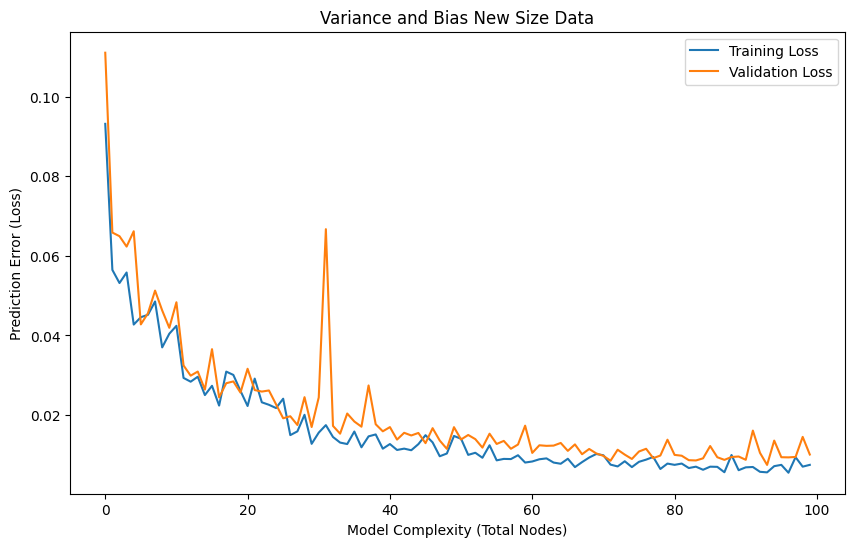

In [ ]:
# N dataset increased by 10%
N_new = 1100
np.random.seed(0)
# X data has been updated
X_new = np.random.rand(N_new, 8)
# new output values ​​calculated
Y_new = polynomials(X_new)
noise_new = np.random.normal(0, 0.001, Y_new.shape)
Y_with_new_noisy = Y_new + noise_new

train_loss_values_new = []
val_loss_values_new = []

# each layer have 6 nodes in initial
initial_nodes = 6
nodes = [initial_nodes] * 3 # 3 hidden layer

#loop generate for repeat times of iteration that adding nodes each layer
for i in range(100):
    adding_nodes = i % 3  #layers are selected sequentially when adding nodes
    nodes[adding_nodes] += 2
    model = Sequential()
    model.add(Input((8,)))
    model.add(Dense(nodes[0], activation=best_combination['activation_functions'][0]))
    model.add(Dense(nodes[1], activation=best_combination['activation_functions'][1]))
    model.add(Dense(nodes[2], activation=best_combination['activation_functions'][2]))
    model.add(Dense(6, activation='linear'))
    optimizer = SGD(learning_rate=best_combination['learning_rates'])
    model.compile(optimizer=optimizer, loss='mse')
    train_data_new_size = model.fit(X_new, Y_with_new_noisy, epochs= best_combination['epochs_number'], validation_split=0.2, verbose=0)
    loss_train_nodes_new = train_data_new_size.history['loss'][-1]
    loss_val_nodes_new = train_data_new_size.history['val_loss'][-1]

    # add loss values lists that generated
    train_loss_values_new.append(loss_train_nodes_new)
    val_loss_values_new.append(loss_val_nodes_new)

    print(f"Repeat times: {i + 1}, Total Nodes: {sum(nodes)}, Train Loss Value: {loss_train_nodes_new:.4f}, Validation Loss Value: {loss_val_nodes_new:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(train_loss_values_new, label="Training Loss")
plt.plot(val_loss_values_new, label="Validation Loss")
plt.xlabel("Model Complexity (Total Nodes)")
plt.ylabel("Prediction Error (Loss)")
plt.title("Variance and Bias New Size Data")
plt.legend()
plt.show()


## **RESULTS**  
6 polynomial equations were created taking 8 input data. These equations were written as a function, then the data consisting of 1000 rows and 8 columns was created using randomly generated input data on the equations. Noise data with an average of 0 and a standard deviation of 0.001 was added to the raw data.
A Feed forward neural network with 6 nodes in each layer with 8 inputs and 3 hidden layers was created. In this model, relu was selected for the activation function to be used in all 3 hidden layers, stochastic gradient descent (SGD) for the optimizer, and Mean squared error (MSE) for the loss function. First of all, the model was trained with 1000 epochs with the prepared data. A graph was created according to the loss results and the optimal **200 epochs** was selected. The following steps continued with this epoch number. The loss values ​​obtained at this stage are as follows: training loss: **0.1524**, validation loss: **0.1562**.

After selecting the best epoch number, 3 different combinations were created for activation functions:

1. relu, relu, relu
2. tanh, relu, relu
3. relu, swish, softmax

The model training was performed by selecting 200 epochs as the beginning with 3 different learning rates (**0.01, 0.001, 0.10**). The model tried all learning rates in each activation combination and the epoch number was increased by 50% twice. In this way, 27 different model trainings with different parameters were performed. A graph was created with the loss values ​​formed after each training. The graphs formed were examined and the model with the lowest validation loss value was selected.
train loss value **0.095**, validation loss value **0.093** results; For activation functions, **tanh, relu, relu** combination was selected, **0.1** for Learning Rate, **450** for Epochs number.

In the model, there were initially 6 nodes in each layer, 2 nodes were added to the number of nodes in each layer, thus creating a cycle. The most optimal parameters obtained in the previous stage were used for this model. **100** times were performed as a cycle and the Total Nodes number in the last stage was observed as **218**, Train Loss Value **0.0036**, ​​Validation Loss Value **0.0077**.
The added nodes increase the complexity of the model. Therefore, a graph was drawn to observe how the loss values ​​change with the increase in the complexity of the model. This graph is the bias and variance graph, here it is possible to observe how the deviation and variance change with the complexity of the model.
In the last stage, the data set was increased by 10% (1100) and the processes were repeated and the outputs were transformed into graphs and examined. After **100** cycles, the Total Nodes number in the model was **218**, Train Loss Value **0.0075**, Validation Loss Value **0.0101**.

## **COMMENTS AND DISCUSSIONS**   

The results obtained allow us to interpret how the changes in hyperparameter optimization and model complexity levels affect each other. As a result of the polynomials in the data preparation process, 8 inputs create 6 different outputs. At this point, a fixed starting 1000 rows of data is created with random.seed, however, the process of generating random numbers is kept under control. Feedforward Neural Network (FFNN) is one of the most basic and common network structures in deep learning methods. This model consists of input layer, hidden layers and output layer. In this study, the model was created using 3 hidden layers and 6 nodes in each layer. First, creating a model for the optimization of the epoch number and determining the epoch value by interpreting the obtained graph allowed the training loss and validation loss to decrease. Using this value as the starting epoch can prevent high bias. Then, the hyperparameter optimization, which is realized as a result of trying 27 different combinations with different activation function, learning rate and epoch number, creates positive effects on the accuracy of the model. As a result of this stage, using tanh, relu, relu activation functions on 3 hidden layers in this order has caused an improvement on the valuation loss value, and the 0.1 determined for the learning rate allows us to comment that the model is learning faster and more effectively. After determining the most suitable eepoch number and finding the most optimal model parameters, it is the answer to the question of how we can make the model more effective by adding complexity to this model. In order to increase the complexity of the model, nodes were added to each layer in order, and as a result, a significant decrease was observed in the training loss value. Smaller increases were observed in the validation loss values, and as a result, it can be commented that the model generalizes well. The same processes were repeated by changing the number of data, and with this process, the effect of the number of data on the obtained loss values ​​could be observed.  

As a result of the literature review for the obtained results, it can be said that the findings are consistent and meet the expectations. In deep neural networks, the activation function has effects on improving performance. ReLU (Rectified Linear Unit) function is a very popular activation function. This function is used in many networks because it does not require the calculation of exponential functions, has a short training time with gradient descent, and easily obtains a sparse representation of a network, and generally shows good performance in large data sets (1). In this study, using ReLU in all layers while determining the number of epochs is a classical approach. With this function, fast learning of the first stage is provided. One of the different activation combinations selected while performing hyperparameter optimization is tanh (Hyperbolic Tangent), relu, relu. Tanh function is a rescaled and biased version of the sigmoid function (2). As a result of the studies on this function, it is found that backpropagation does not have the problem of the vanishing gradient during the epitim process and therefore the calculation time is short because it does not require a pre-training algorithm (2). In this study, sensitivity to negative and positive inputs can be provided by using tanh in the first layer, a symmetric distribution can be provided and the presence of the relu function in the following layer makes the radian flow of the model fast. Relu, swish and softmax functions were used in the 3rd combination. As a result of the literature review, it was stated that the simplicity of the swish function and its similarity to the relu function increased the accuracy rate by replacing the relu function with swish in some studies (3). The softmax function is a function used intensively in multi-class problems and provides interpretation as a probability. In this study, it is seen that the most optimal of these combinations is tanh, relu, relu, and this situation supports the expectations. The best value for the learning rate values ​​was selected as 0.1. The learning rate ensures that the model learns quickly and plays a role in not missing the optimum point with excessively large steps. The 0.1 value determined in the model was effective in the fast operation of the model. In literature reviews, it has been stated that the learning rate value is associated with the training times of the model and has an inverse proportion to accuracy, but there is no clear statement that shorter model training is more incorrect or longer model training is more accurate. In the study, the increase in model complexity caused the training loss to decrease and the validation loss to increase, which is consistent with the studies in this field. The increase in the size of the data set improved the generalization capacity of the model and slightly reduced the validation loss. When the bias and variance graph is examined, it is observed that the train and validation errors start close to each other and high and decrease as the complexity increases. In the graph drawn with 100 cycles, it is seen that the validation error starts to increase towards the end, so it can be run again by increasing the number of cycles for separation, but the fact that this process takes a long time is a disadvantage, in such cases it may be necessary to use GPU support on the computer.



## **REFERENCES**

1. Ding, B., Qian, H., & Zhou, J. (2018, June). Activation functions and their characteristics in deep neural networks. In 2018 Chinese control and decision conference (CCDC) (pp. 1836-1841). IEEE.
2. Lau, M. M., & Lim, K. H. (2018, December). Review of adaptive activation function in deep neural network. In 2018 IEEE-EMBS Conference on Biomedical Engineering and Sciences (IECBES) (pp. 686-690). IEEE.
3. Ramachandran, P., Zoph, B., & Le, Q. V. (2017). Searching for activation functions. arXiv preprint arXiv:1710.05941.



### Object recognition using CNNs

**Data Upload and Generating**
1. Created Images Data
2. Adding Noisy points

In [ ]:
# Uploaded folders on github
!git clone https://github.com/TimoFlesch/2D-Shape-Generator.git


In [ ]:
# !pip install pycairo

In [ ]:
import random
from PIL import Image
import numpy as np
#The shape names in the images to be obtained are specified
shape = ["ellipse", "rect", "poly3", "poly5", "poly6", "poly7", "star5", "star8"]

#for noisy added salt and pepper noise added in the images
def noise_adding(data_image, amount=0.05):
    data_image = np.array(data_image)
    noisy_image = np.copy(data_image)
    #amount of noise to be added calculated
    salt_points = np.ceil(amount * data_image.size * 0.1) 
    pepper_points = np.ceil(amount * data_image.size * 0.1)
    for i in range(int(salt_points)):
        x, y = np.random.randint(0, data_image.shape[0]), np.random.randint(0, data_image.shape[1])
        noisy_image[x, y] = 255
    for i in range(int(pepper_points)):
        x, y = np.random.randint(0, data_image.shape[0]), np.random.randint(0, data_image.shape[1])
        noisy_image[x, y] = 0
    return noisy_image

#generated images and added noisy and recorded the results
for i in range(len(shape)):
    for j in range(100): # generated 800 images(each shapes have 100 images)
        #coordinates 30,100 were given to prevent shapes from going out of view (varying locations)
        stim_trx = random.randint(30, 100) 
        stim_try = random.randint(30, 100)
        #size changes (varying sizes)
        scale_1 = random.uniform(0.2, 1.5)
        scale_2 = random.uniform(0.2, 1.5)
        #images were created at random rotation angles (varying orientation)
        rota = random.randint(0, 360)

        #The command to create the shape was run from the terminal
        image_name = f"img_{shape[i]}_{j+1}.png"
        !python main.py --name {shape[i]}_{j+1} --shapes {shape[i]} --canvas_size 128 128 --stim_trx {stim_trx} --stim_try {stim_try} --stim_scale {scale_1} {scale_2} --stim_rota {rota}

        # generated images opened and added noisy
        image = Image.open(image_name)
        noisy_image = noise_adding(image)

        # recorded results in file
        noisy_image_name = f"img_{shape[i]}_{j+1}.png"
        noisy_image_save = Image.fromarray(noisy_image.astype(np.uint8))
        noisy_image_save.save(noisy_image_name)


**Files**
1. Move image files new file
2. Generate file for training and validation
3. Split train and validation data

In [35]:
import os
import shutil
import random

#The images were separated into different subfolders according to the shapes, then for validation the data was randomly distributed as 60% train and 40% validation and kept in different folders
#source and destination folders
data_file = "img" # images that created move img file and this file used for source file.
train_file = "training"
val_file = "validation"
# train and validation folders generated
os.makedirs(train_file, exist_ok=True)
os.makedirs(val_file, exist_ok=True)

# generated subfolder according to shapes 
for filename in os.listdir(data_file):
    if filename.endswith('.png'):  # only png folders
        shape_type = filename.split('_')[1]  # shapes that in filename
        shape_file = os.path.join(data_file, shape_type)  # file for shapes
        os.makedirs(shape_file, exist_ok=True)  #generated folders
        shutil.move(os.path.join(data_file, filename), os.path.join(shape_file, filename))  # moved to shapes folder

#split data for validation data
for shape_type in os.listdir(data_file):
    shape_file = os.path.join(data_file, shape_type)

    if os.path.isdir(shape_file): 
        # subfolders generated for train and validation data
        shape_train_file = os.path.join(train_file, shape_type)
        shape_val_file = os.path.join(val_file, shape_type)
        os.makedirs(shape_train_file, exist_ok=True)
        os.makedirs(shape_val_file, exist_ok=True)
        # for randomly selected train and validation data 
        image_files = [f for f in os.listdir(shape_file) if f.endswith('.png')]
        # %60 train, %40 validation 
        val_split = int(0.6 * len(image_files))
        train_files = image_files[:val_split]
        val_files = image_files[val_split:]
        # move folders to files
        for filename in train_files:
            shutil.move(os.path.join(shape_file, filename), os.path.join(shape_train_file, filename))
        for filename in val_files:
            shutil.move(os.path.join(shape_file, filename), os.path.join(shape_val_file, filename))
print("Files Created..")

Files Created..


**Data Preprocessing**
1. Data normalization
2. Data encoding
3. Conver Appropriate Format

In [1]:
# normalization was done for data preparation before training
generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
# A function was written to convert the data into the appropriate format
def prepare_format(source_file: str):
  prepared_data = generator.flow_from_directory(source_file,
                                                 target_size=(128, 128),
                                                 batch_size=16,
                                                 class_mode="categorical",
                                                 color_mode="grayscale",
                                                 shuffle=True)
  return prepared_data

In [2]:
# training and validation data converted to appropriate format
training_data = prepare_format("training")
validation_data = prepare_format("validation")

Found 480 images belonging to 8 classes.
Found 320 images belonging to 8 classes.


**Model Training**
1. Generated Combination of Different Activation Function and Learning Rates
2. Generated AlexNet Model
3. Model Training
4. Record Results
5. Drawn Plot for Results
6. Select Best Parameter

Model training with Activation: relu, Learning Rate: 0.01
Train Loss Value: 1.6036, Validation Loss Value: 2.3167


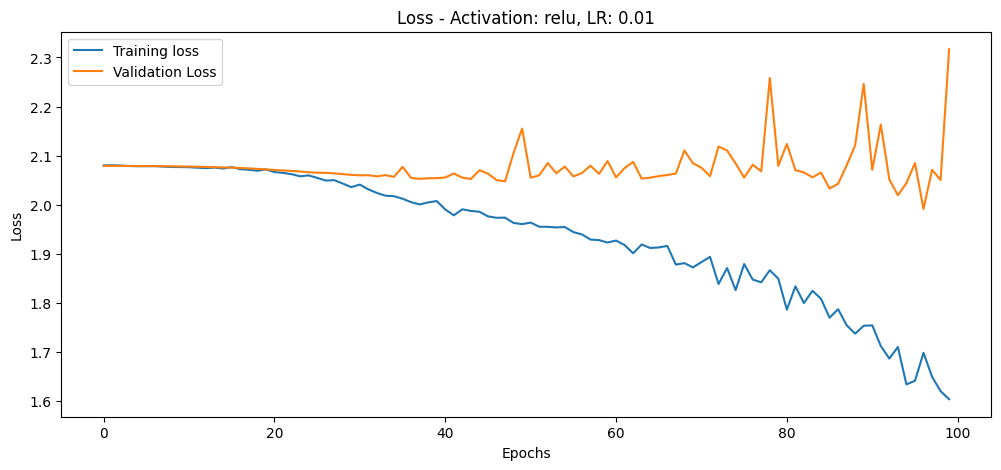

Model training with Activation: relu, Learning Rate: 0.05
Train Loss Value: 0.0027, Validation Loss Value: 4.7963


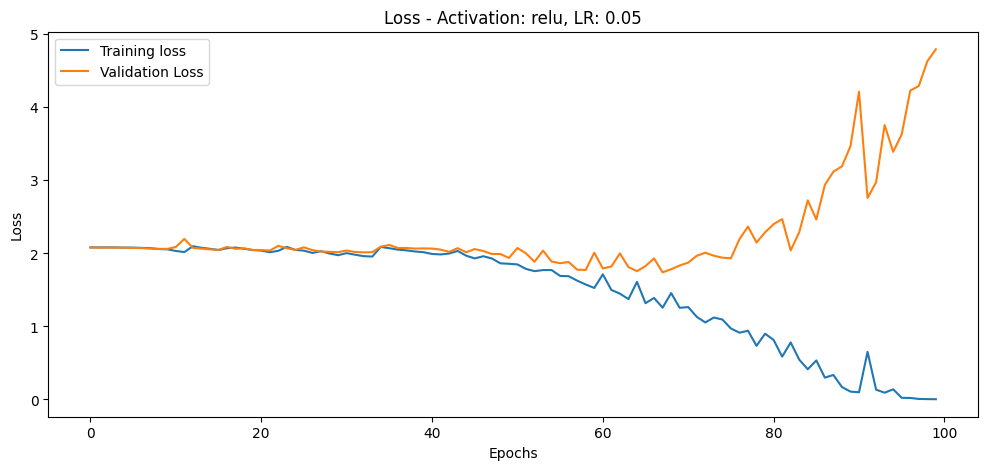

Model training with Activation: tanh, Learning Rate: 0.01
Train Loss Value: 0.0077, Validation Loss Value: 3.2379


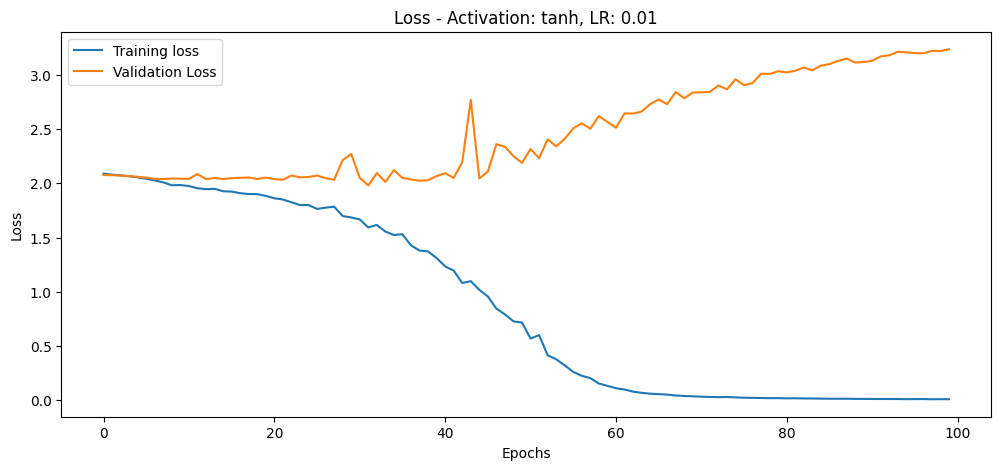

Model training with Activation: tanh, Learning Rate: 0.05
Train Loss Value: 0.0003, Validation Loss Value: 3.7144


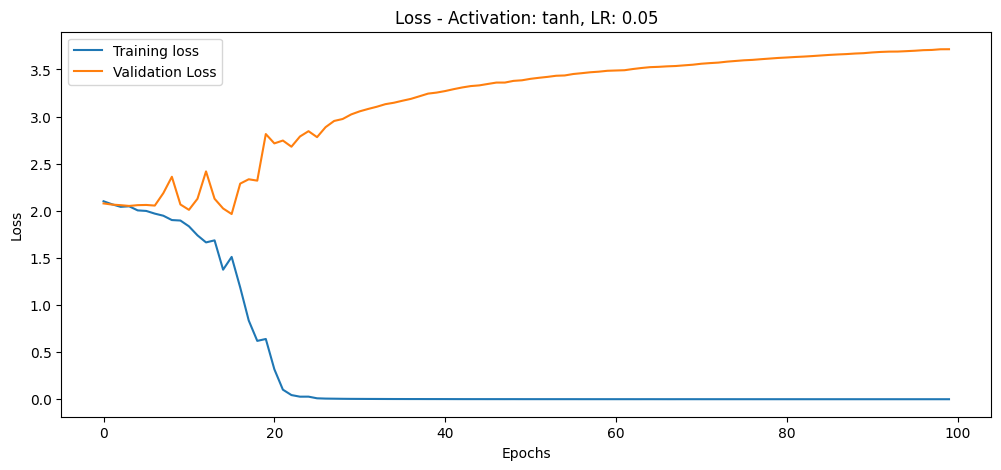

Model training with Activation: leaky_relu, Learning Rate: 0.01
Train Loss Value: 1.4145, Validation Loss Value: 2.1911


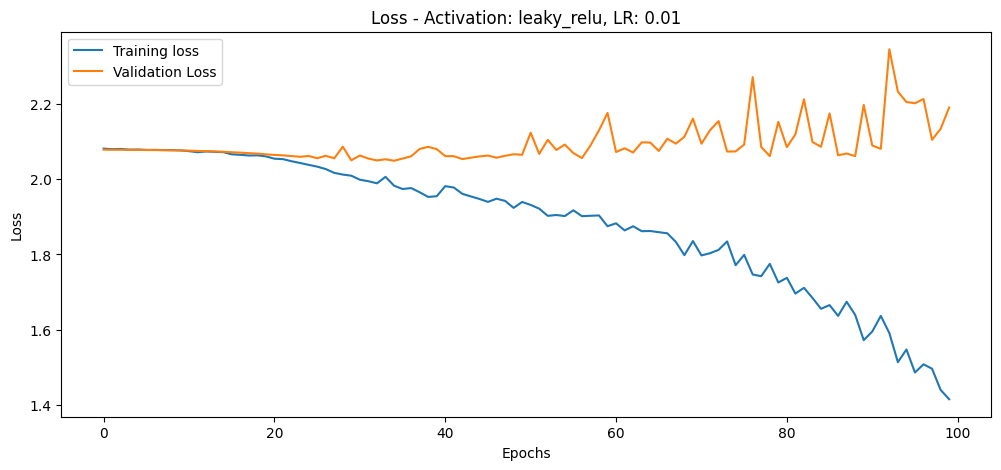

Model training with Activation: leaky_relu, Learning Rate: 0.05
Train Loss Value: 0.0006, Validation Loss Value: 5.2067


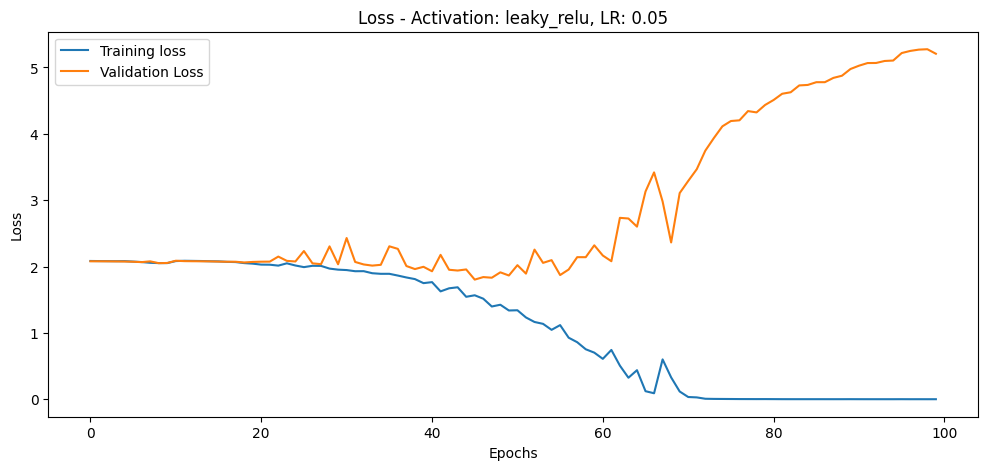

In [14]:
# for model generated, import moduls
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

# generated lists for different combination of activation functions and learning rates
activation_functions = ["relu", "tanh", "leaky_relu"]
learning_rates = [0.01, 0.05]

# record all results 
results = []

# AlexNet model generated 
def alexnet(input_shape, num_classes, activation_function):
    model = Sequential() 
    model.add(Input(shape=input_shape)) #input shape refer pixel size of images (128,128,1)
    #first convolution layer
    model.add(Conv2D(96, (11, 11), strides=4, activation=activation_function))
    model.add(MaxPooling2D((3, 3), strides=2))
    #second convolution layer
    model.add(Conv2D(256, (5, 5), padding='same', activation=activation_function))
    model.add(MaxPooling2D((3, 3), strides=2))
    #third convolution layer
    model.add(Conv2D(384, (3, 3), padding='same', activation=activation_function))
    #fourth convolution layer
    model.add(Conv2D(384, (3, 3), padding='same', activation=activation_function))
    #fifth convolution layer
    model.add(Conv2D(256, (3, 3), padding='same', activation=activation_function))
    model.add(MaxPooling2D((3, 3), strides=2))
    model.add(Flatten()) 
    #fully connected layers
    model.add(Dense(4096, activation=activation_function)) #node number:4096
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation=activation_function))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model

# input values for model training
input_shape = (128, 128, 1) #1 refer black and white images
num_classes = 8 #8 different shapes in data
num_epochs = 100

#generated loop for combinations all parameters
for i in activation_functions:
    for j in learning_rates:
        print(f"Model training with Activation: {i}, Learning Rate: {j}") # printed each combination activation function and laerning rate
        model = alexnet(input_shape, num_classes, i)
        optimizer = SGD(learning_rate=j) #Stochastic Gradient Descent (SGD) used for optimization
        #use categorical_crosssentropy because one hot encoding use for labelling
        model.compile(optimizer=optimizer, loss='categorical_crossentropy') 
        # Model training
        history = model.fit(
            training_data,
            epochs=num_epochs,
            validation_data=validation_data,
            verbose=0
        )
        # record loss values final step
        val_loss = history.history['val_loss'][-1]
        train_loss = history.history['loss'][-1]
        #record all parameters
        results.append({
            "activation": i,
            "learning_rate": j,
            "val_loss": val_loss,
            'train_loss': train_loss,
            'epochs_number': num_epochs,
        })
        print(f"Train Loss Value: {train_loss:.4f}, Validation Loss Value: {val_loss:.4f}")
        # draw plot for each combination results
        plt.figure(figsize=(12, 5))
        plt.title(f'Loss - Activation: {i}, LR: {j}') 
        plt.plot(history.history['loss'], label='Training loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()


In [19]:
def best_parameters(output):
    # used min function for find best parameter that have lowest validation loss value in all results
    parameters = min(output, key=lambda x: x['val_loss'])
    print("Best combination of parameters that have lowest validation errors:")
    print(f"Activation Combination: {parameters['activation']}")
    print(f"Learning Rate: {parameters['learning_rate']}")
    print(f"Epochs: {parameters['epochs_number']}")
    print(f"Train Loss: {parameters['train_loss']}")
    print(f"Validation Loss: {parameters['val_loss']}")
best_parameters(results)

Best combination of parameters that have lowest validation errors:
Activation Combination: leaky_relu
Learning Rate: 0.01
Epochs: 100
Train Loss: 1.4144575595855713
Validation Loss: 2.191051959991455


**Different Node Size**
1. Generated AlexNet Model That Have Different Node Number
2. Change the number of nodes in the fully connected layer by 10% for three times
3. Model Training
4. Record Results
5. Drawn Plot for Results
6. Select Best Parameter

Model training with Activation: relu, Learning Rate: 0.01
Train Loss Value: 1.5717, Validation Loss Value: 2.0639


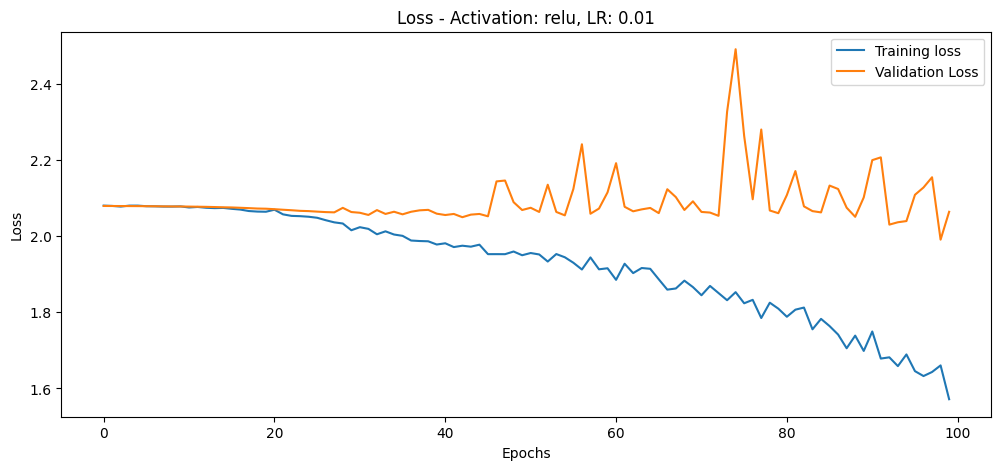

Model training with Activation: relu, Learning Rate: 0.05
Train Loss Value: 0.0005, Validation Loss Value: 4.8121


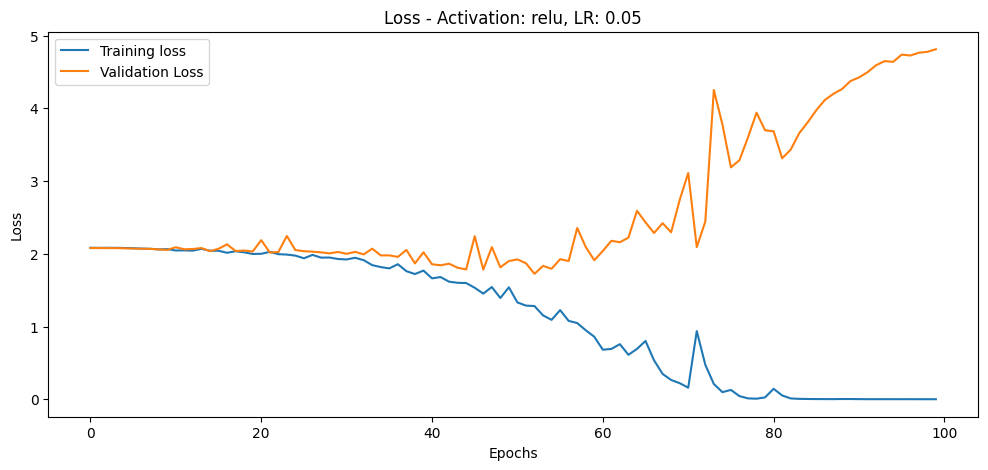

Model training with Activation: tanh, Learning Rate: 0.01
Train Loss Value: 0.0069, Validation Loss Value: 3.3108


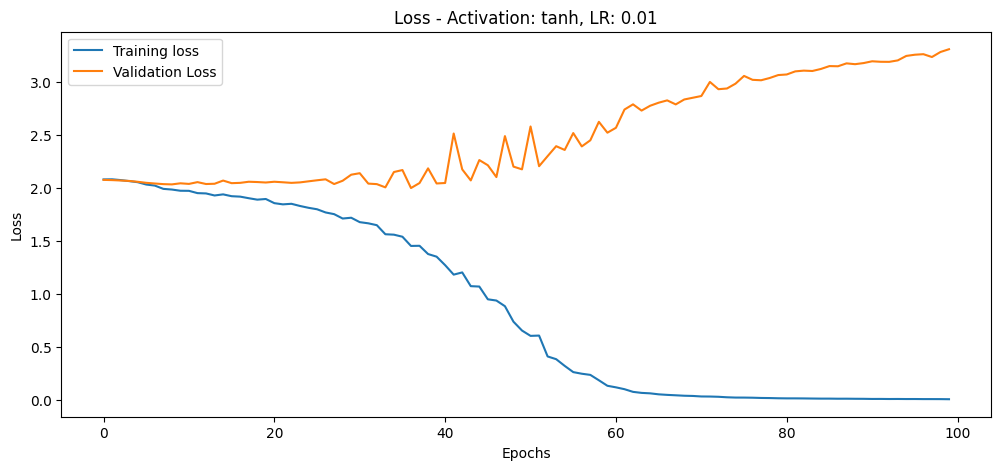

Model training with Activation: tanh, Learning Rate: 0.05
Train Loss Value: 0.0004, Validation Loss Value: 3.5708


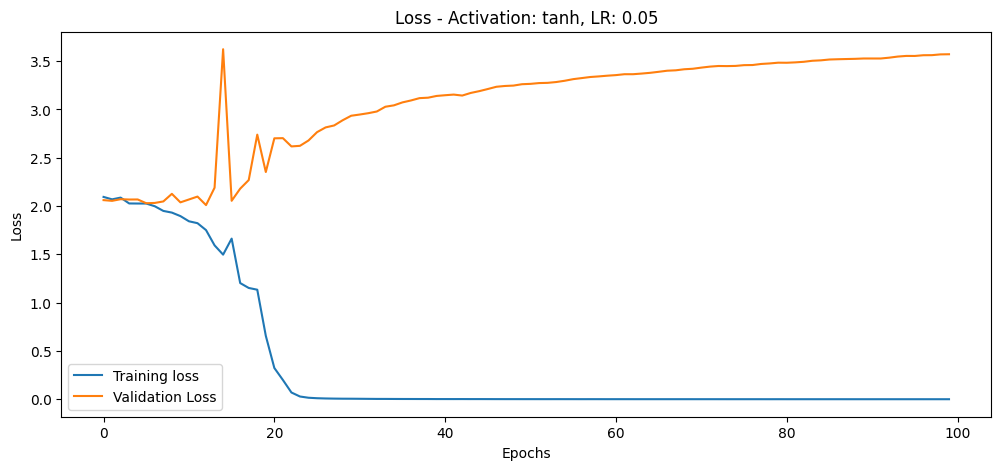

Model training with Activation: leaky_relu, Learning Rate: 0.01
Train Loss Value: 1.3018, Validation Loss Value: 2.0931


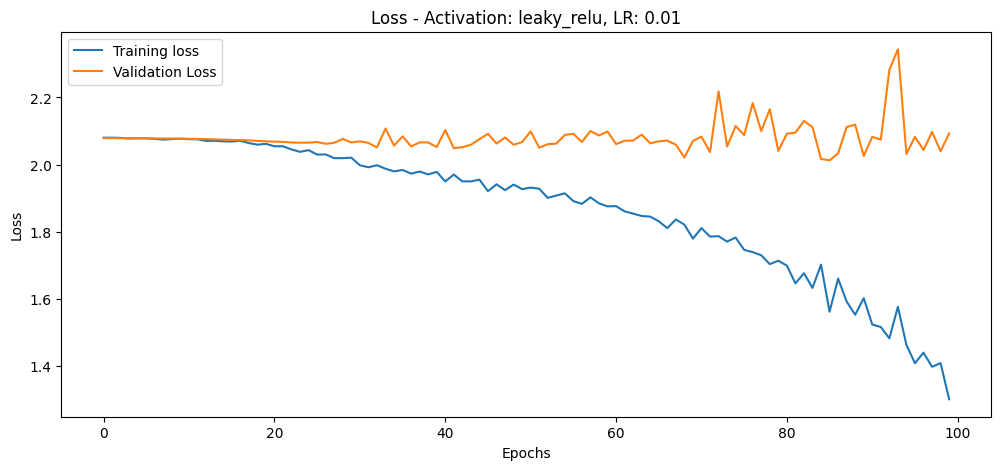

Model training with Activation: leaky_relu, Learning Rate: 0.05
Train Loss Value: 0.0005, Validation Loss Value: 5.2434


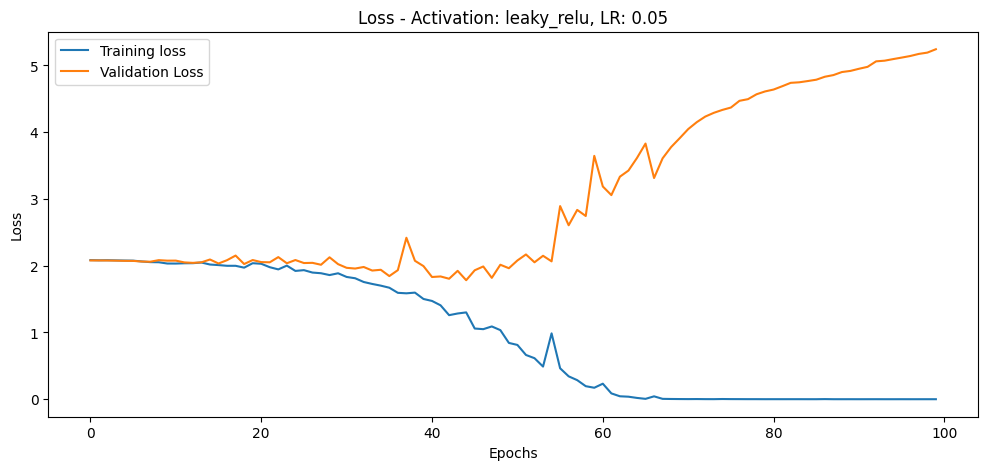

In [28]:
results_dif_nodes = []
# generated alexnet model that different node size in fully connected layer
def alexnet_dif_nodes(input_shape, num_classes, activation_function):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv2D(96, (11, 11), strides=4, activation=activation_function))
    model.add(MaxPooling2D((3, 3), strides=2))
    model.add(Conv2D(256, (5, 5), padding='same', activation=activation_function))
    model.add(MaxPooling2D((3, 3), strides=2))
    model.add(Conv2D(384, (3, 3), padding='same', activation=activation_function))
    model.add(Conv2D(384, (3, 3), padding='same', activation=activation_function))
    model.add(Conv2D(256, (3, 3), padding='same', activation=activation_function))
    model.add(MaxPooling2D((3, 3), strides=2))
    model.add(Flatten())
    # reduce node size 10% for three times 
    model.add(Dense(4096* 0.9 * 0.9 * 0.9, activation=activation_function))
    model.add(Dropout(0.5))
    model.add(Dense(4096* 0.9 * 0.9 * 0.9, activation=activation_function))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model

for i in activation_functions:
    for j in learning_rates:
        print(f"Model training with Activation: {i}, Learning Rate: {j}")
        model = alexnet_dif_nodes(input_shape, num_classes, i)
        optimizer = SGD(learning_rate=j)
        model.compile(optimizer=optimizer, loss='categorical_crossentropy')
        
        # Modeli eğit ve eğitim sonuçlarını sakla
        history_dif_nodes = model.fit(
            training_data,
            epochs=num_epochs,  # Test amacıyla epoch sayısını 10 yapabilirsiniz
            validation_data=validation_data,
            verbose=0
        )
        
        # Son epoch'taki validation loss değerini kaydet
        val_loss_dif_nodes = history_dif_nodes.history['val_loss'][-1]
        train_loss_dif_nodes = history_dif_nodes.history['loss'][-1]
        
        results_dif_nodes.append({
            "activation": i,
            "learning_rate": j,
            "val_loss": val_loss_dif_nodes,
            'train_loss': train_loss_dif_nodes,
            'epochs_number': num_epochs,
        })
        print(f"Train Loss Value: {train_loss_dif_nodes:.4f}, Validation Loss Value: {val_loss_dif_nodes:.4f}")
        # Eğitim ve doğrulama kayıplarını çiz
        plt.figure(figsize=(12, 5))
        
        # Kayıp grafiği
        plt.title(f'Loss - Activation: {i}, LR: {j}')
        plt.plot(history_dif_nodes.history['loss'], label='Training loss')
        plt.plot(history_dif_nodes.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()


In [29]:
best_parameters(results_dif_nodes)

Best combination of parameters that have lowest validation errors:
Activation Combination: relu
Learning Rate: 0.01
Epochs: 100
Train Loss: 1.5717072486877441
Validation Loss: 2.0639255046844482


**Reduce Node Size and Remove Layers**
1. Generated AlexNet Model That Have Different Node Number and Reduced Layer
2. Continuing with %15 of the nodes in the fully connected layer, remove the third layer 
3. Model Training
4. Record Results
5. Drawn Plot for Results
6. Select Best Parameter

Model training with Activation: relu, Learning Rate: 0.01
Train Loss Value: 1.1277, Validation Loss Value: 2.3526


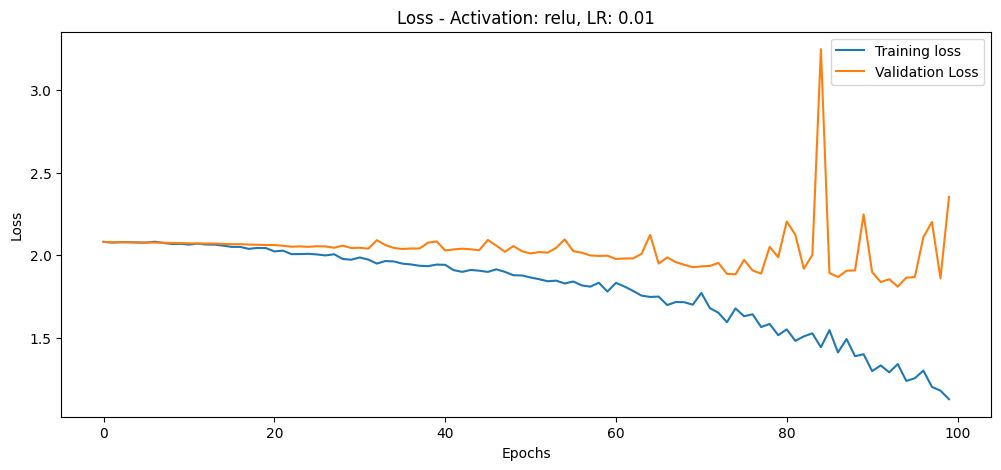

Model training with Activation: relu, Learning Rate: 0.05
Train Loss Value: 0.0017, Validation Loss Value: 3.3598


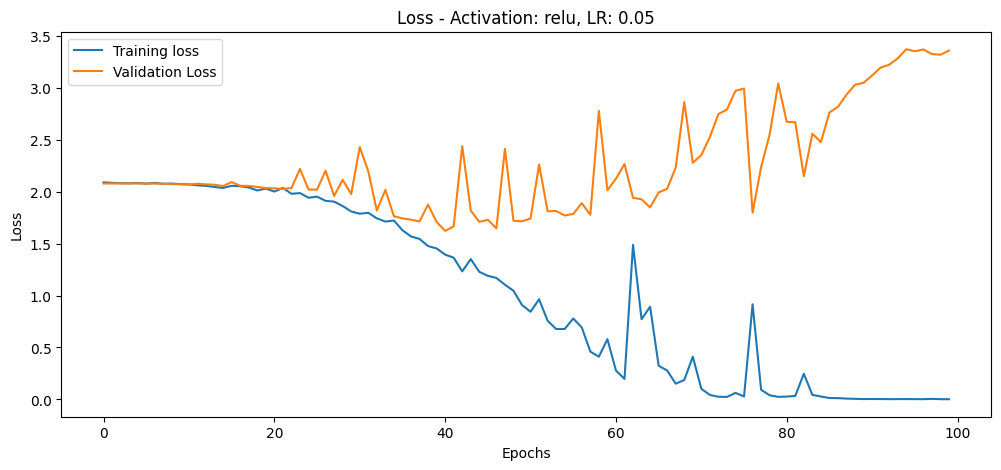

Model training with Activation: tanh, Learning Rate: 0.01
Train Loss Value: 0.0194, Validation Loss Value: 2.7296


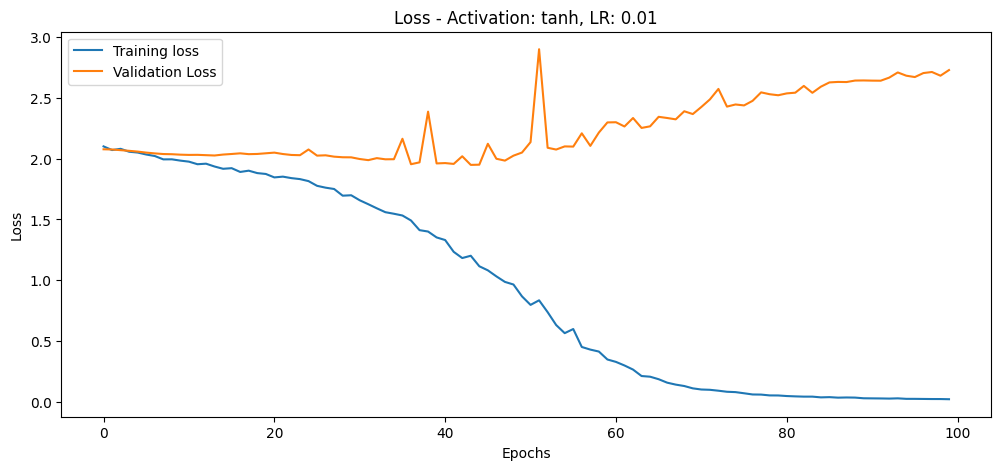

Model training with Activation: tanh, Learning Rate: 0.05
Train Loss Value: 0.0009, Validation Loss Value: 3.0955


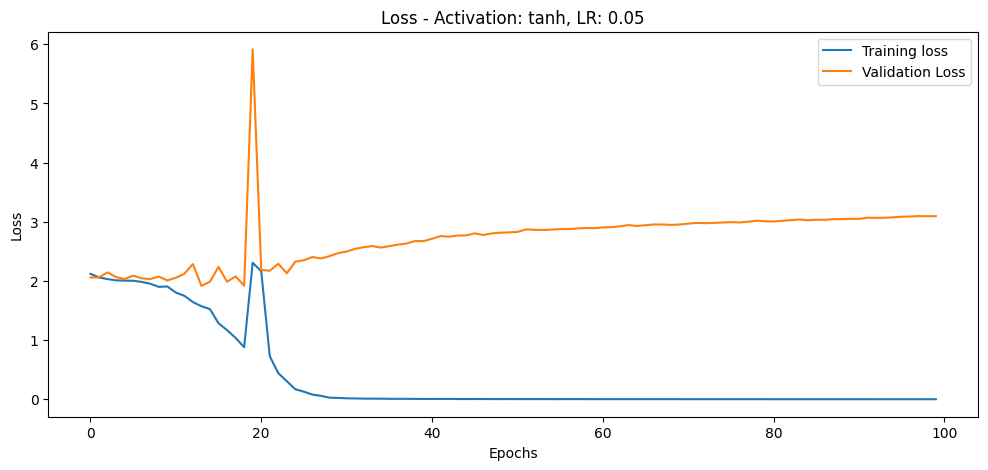

Model training with Activation: leaky_relu, Learning Rate: 0.01
Train Loss Value: 0.8466, Validation Loss Value: 2.1752


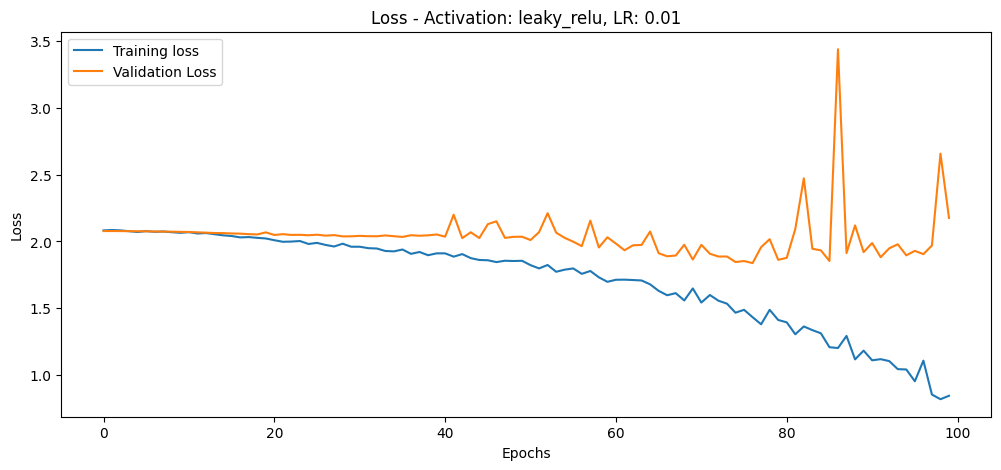

Model training with Activation: leaky_relu, Learning Rate: 0.05
Train Loss Value: 0.0010, Validation Loss Value: 3.7755


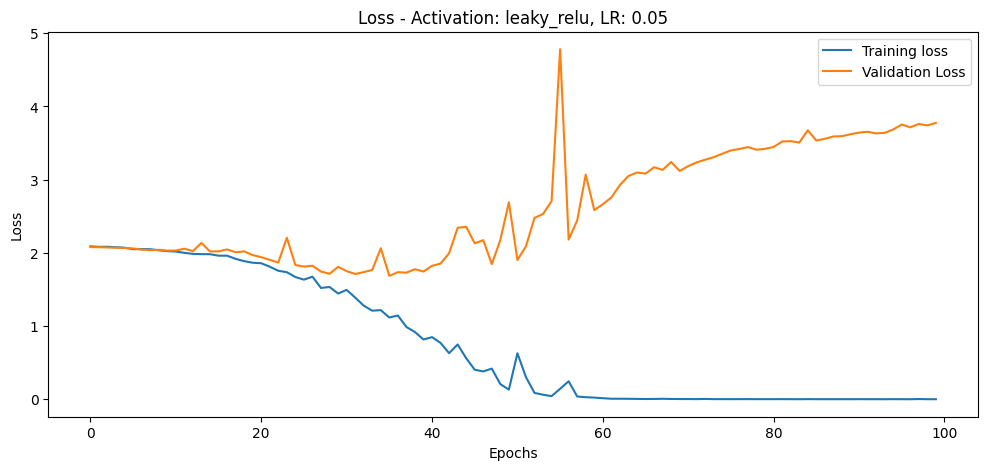

In [17]:
results_15 = []
#generated model for reduce node size (%15) and remove fully connected layer
def alexnet_15(input_shape, num_classes, activation_function):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv2D(96, (11, 11), strides=4, activation=activation_function))
    model.add(MaxPooling2D((3, 3), strides=2))
    model.add(Conv2D(256, (5, 5), padding='same', activation=activation_function))
    model.add(MaxPooling2D((3, 3), strides=2))
    model.add(Conv2D(384, (3, 3), padding='same', activation=activation_function))
    model.add(MaxPooling2D((3, 3), strides=2))
    model.add(Flatten())
    model.add(Dense(4096 * 0.15, activation=activation_function))
    model.add(Dropout(0.5))
    model.add(Dense(4096 * 0.15, activation=activation_function))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model

for i in activation_functions:
    for j in learning_rates:
        print(f"Model training with Activation: {i}, Learning Rate: {j}")
        model = alexnet_15(input_shape, num_classes, i)
        optimizer = SGD(learning_rate=j)
        model.compile(optimizer=optimizer, loss='categorical_crossentropy')
        
        # Modeli eğit ve eğitim sonuçlarını sakla
        history_15 = model.fit(
            training_data,
            epochs=num_epochs,  # Test amacıyla epoch sayısını 10 yapabilirsiniz
            validation_data=validation_data,
            verbose=0
        )
        
        # Son epoch'taki validation loss değerini kaydet
        val_loss_15 = history_15.history['val_loss'][-1]
        train_loss_15 = history_15.history['loss'][-1]
        
        results_15.append({
            "activation": i,
            "learning_rate": j,
            "val_loss": val_loss_15,
            'train_loss': train_loss_15,
            'epochs_number': num_epochs,
        })
        print(f"Train Loss Value: {train_loss_15:.4f}, Validation Loss Value: {val_loss_15:.4f}")
        # Eğitim ve doğrulama kayıplarını çiz
        plt.figure(figsize=(12, 5))
        
        # Kayıp grafiği
        plt.title(f'Loss - Activation: {i}, LR: {j}')
        plt.plot(history_15.history['loss'], label='Training loss')
        plt.plot(history_15.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()


In [20]:
best_parameters(results_15)

Best combination of parameters that have lowest validation errors:
Activation Combination: leaky_relu
Learning Rate: 0.01
Epochs: 100
Train Loss: 0.8466092944145203
Validation Loss: 2.17521333694458


**Reduce Node Size and Remove Layers**
1. Generated AlexNet Model That Have Different Node Number and Reduced Layer
2. Continuing with %20 of the nodes in the fully connected layer, remove the third layer 
3. Model Training
4. Record Results
5. Drawn Plot for Results
6. Select Best Parameter

Model training with Activation: relu, Learning Rate: 0.01
Train Loss Value: 1.1001, Validation Loss Value: 1.8806


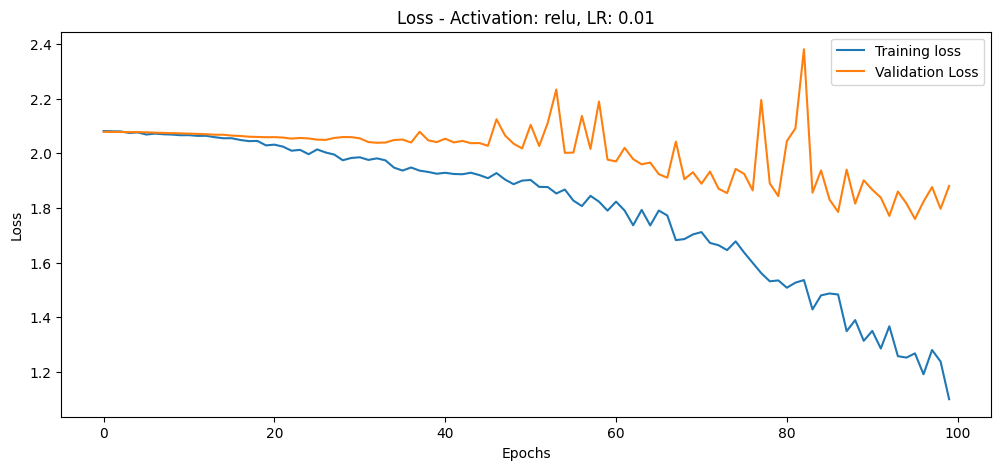

Model training with Activation: relu, Learning Rate: 0.05
Train Loss Value: 0.0023, Validation Loss Value: 2.9932


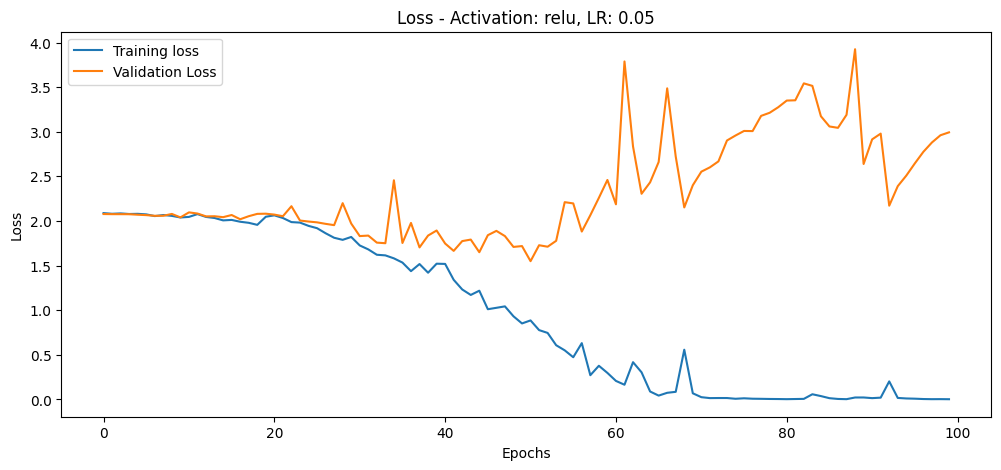

Model training with Activation: tanh, Learning Rate: 0.01
Train Loss Value: 0.0184, Validation Loss Value: 2.5869


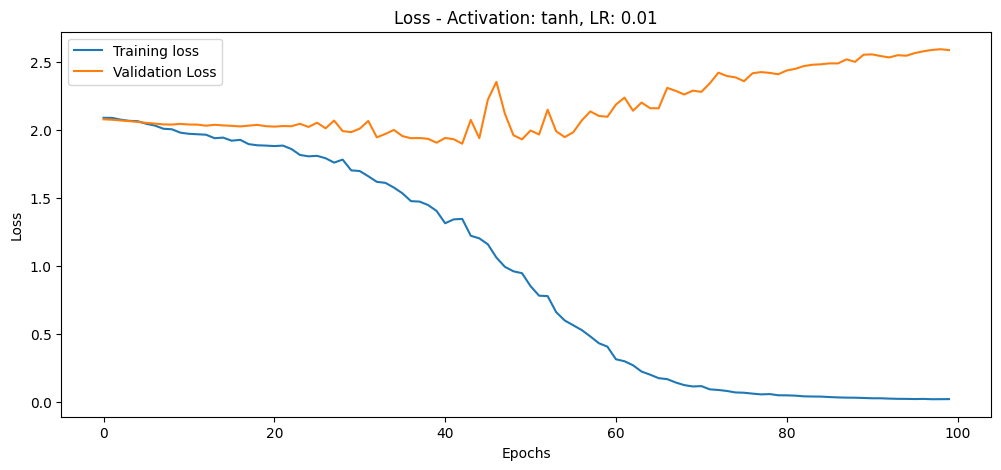

Model training with Activation: tanh, Learning Rate: 0.05
Train Loss Value: 0.0007, Validation Loss Value: 3.3026


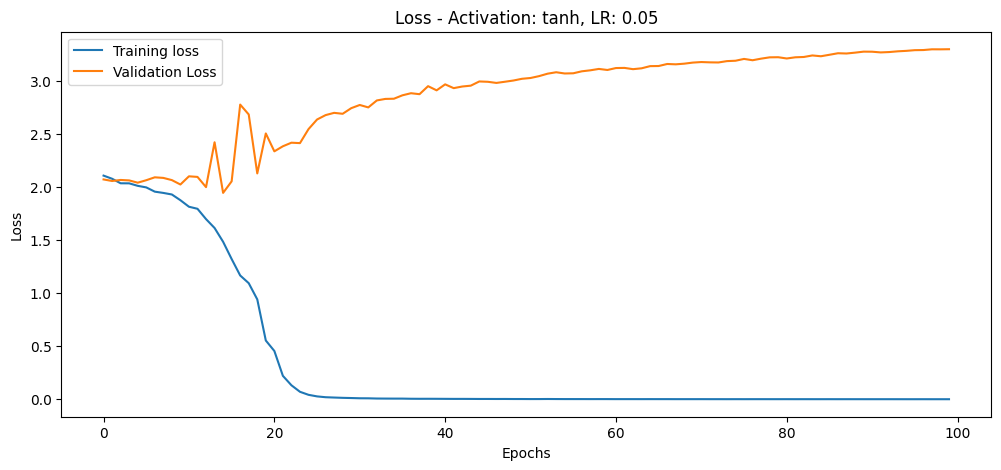

Model training with Activation: leaky_relu, Learning Rate: 0.01
Train Loss Value: 0.7644, Validation Loss Value: 2.0069


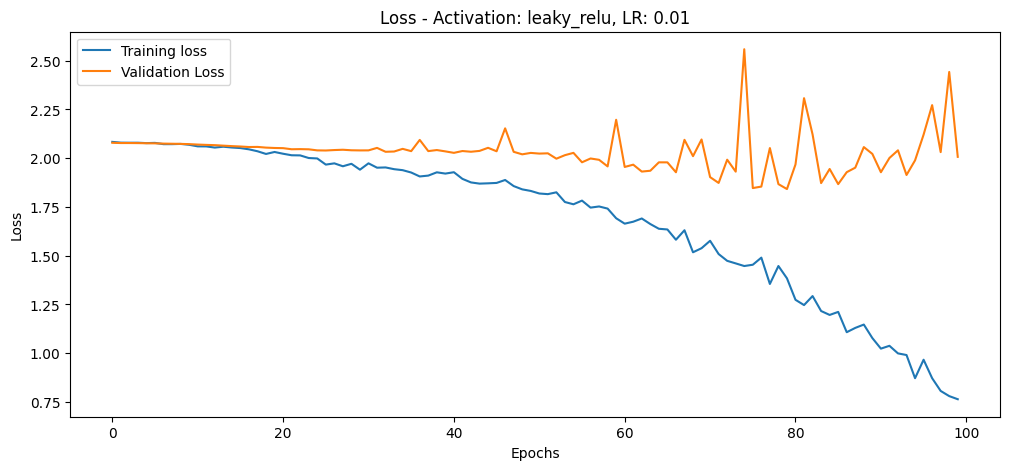

Model training with Activation: leaky_relu, Learning Rate: 0.05
Train Loss Value: 0.0007, Validation Loss Value: 3.5948


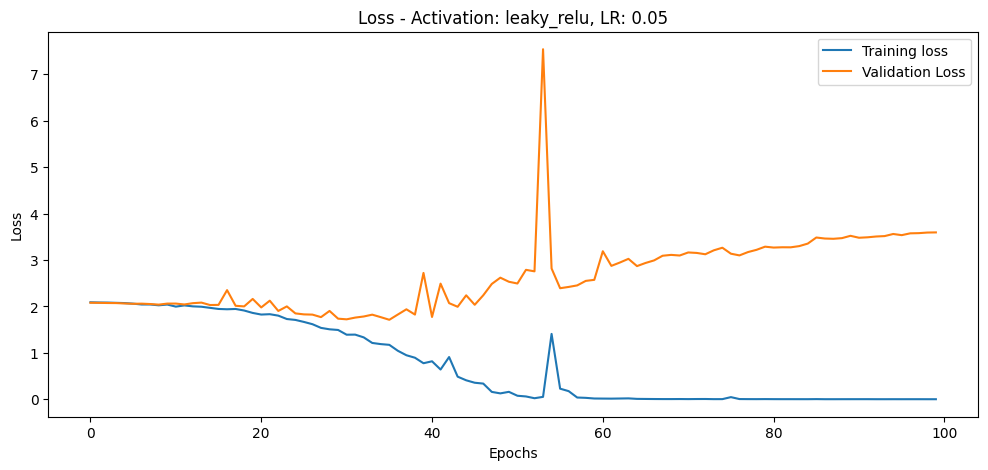

In [24]:
results_20 = []
#generated model for reduce node size (%20) and remove fully connected layer
def alexnet_20(input_shape, num_classes, activation_function):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv2D(96, (11, 11), strides=4, activation=activation_function))
    model.add(MaxPooling2D((3, 3), strides=2))
    model.add(Conv2D(256, (5, 5), padding='same', activation=activation_function))
    model.add(MaxPooling2D((3, 3), strides=2))
    model.add(Conv2D(256, (3, 3), padding='same', activation=activation_function))
    model.add(MaxPooling2D((3, 3), strides=2))
    model.add(Flatten())
    model.add(Dense(4096 * 0.20, activation=activation_function))
    model.add(Dropout(0.5))
    model.add(Dense(4096 * 0.20, activation=activation_function))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model

for i in activation_functions:
    for j in learning_rates:
        print(f"Model training with Activation: {i}, Learning Rate: {j}")
        model = alexnet_20(input_shape, num_classes, i)
        optimizer = SGD(learning_rate=j)
        model.compile(optimizer=optimizer, loss='categorical_crossentropy')
        
        # Modeli eğit ve eğitim sonuçlarını sakla
        history_20 = model.fit(
            training_data,
            epochs=num_epochs,  # Test amacıyla epoch sayısını 10 yapabilirsiniz
            validation_data=validation_data,
            verbose=0
        )
        
        # Son epoch'taki validation loss değerini kaydet
        val_loss_20 = history_20.history['val_loss'][-1]
        train_loss_20 = history_20.history['loss'][-1]
        
        results_20.append({
            "activation": i,
            "learning_rate": j,
            "val_loss": val_loss_20,
            'train_loss': train_loss_20,
            'epochs_number': num_epochs,
        })
        print(f"Train Loss Value: {train_loss_20:.4f}, Validation Loss Value: {val_loss_20:.4f}")
        # Eğitim ve doğrulama kayıplarını çiz
        plt.figure(figsize=(12, 5))
        
        # Kayıp grafiği
        plt.title(f'Loss - Activation: {i}, LR: {j}')
        plt.plot(history_20.history['loss'], label='Training loss')
        plt.plot(history_20.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()


In [25]:
best_parameters(results_20)

Best combination of parameters that have lowest validation errors:
Activation Combination: relu
Learning Rate: 0.01
Epochs: 100
Train Loss: 1.1001434326171875
Validation Loss: 1.8805593252182007


## **RESULTS**  
In this section, a convolutional neural network (CNN) for image recognition is created. 2D-Shape-Generator is a Python library that is a highly customizable generator for 2D shapes that can be modified as parameters on GitHub. First, we copied the library from GitHub to the workspace. Using main.py included in the library, different shape images (ellipse, rectangle, poly3, poly5, poly6, poly7, star5, star8) can be generated. Data was created with **128x128** pixel images with different shapes, salt and pepper noise was added, and only black and white colors were used. While adding noise, **10%** noise ratio was used for each salt and pepper node. **800** images (100 images for each shape) were created for the dataset. Main.py has many parameters, and in this study, some parameters were modified while generating the images. Using stim_trx and stim_try, shape positions were created in the images with values ranging from **30** to **100**. The scale parameter was used to create shapes with dimensions ranging from 0.2 to 1.5. The route parameter refers to the rotation of the shape in the images and this value was randomly changed between 0 and 360 degrees. The parameters were randomly determined in the mentioned ranges and used to create images. The images created were filed in two separate files as training and validation according to their shapes. 70% of the created dataset was used for training and 30% for validation. Then, the normalized data was converted to a suitable format for model training as batch size 16. 480 images were made ready for training and 320 images were made ready for validation.

The AlexNet model was created for training. The model structure was printed in a function. The model was created by adding 5 convolution layers, 3 maxpooling, 3 fully connected layers, and two dropouts. **softmax** was used as the activation function in the output layer. For model training, 3 different activation functions (**relu, tanh, leaky_relu**), two different learning rates (**0.01**, **0.05**) and 6 different combinations were tried. While training the model, **128,128.1** were given for the input shape, **8** for the class number and **100** for the epoch number. **SGD** was used as the optimizer and **categorical_crossentropy** was used as the loss function. In the model results run with these values, a graph was created with the loss values (Train_1). The best parameters were selected according to the lowest validation loss value. Then, the number of nodes in the fully connected layer was reduced by 10% 3 times and the model training was repeated with 6 different combinations (Train_2). Finally, 15% and 20% of the node numbers in the fully connected layer were taken and the 3rd and 4th Convolutional layers were removed and the model was re-trained for 6 different combinations (Train_3 & Train_4). The parameters and loss values with the lowest validation loss value in the training results are shown in the table below (Table 1).

Table 1. Parameters that have lowest validation loss.
| Parameters | Train_1 | Train_2 | Train_3 | Train_4  |
|----------|----------|----------|----------|----------|
|Activation Function| Leaky_relu   |relu  |leaky_relu | relu |
|Learning Rate| 0.01  | 0.01 | 0.01 | 0.01 |
|Epoch| 100 | 100 | 100 | 100 |
|Validation Loss|1.4144 | 1.5717 | 0.8466 | 1.1001 |
|Training Loss| 2.1910 | 2.0639 |2.1752 |1.8805 |


## **COMMENTS AND DISCUSSIONS**
AlexNet is one of the successful applications of CNN with its methods including 11x11, 5x5, 3x3, convolutions, maximum pooling, dropout, measurement expansion, ReLU excitations, SGD with pressure and hyper parameter adjustment methods (1). 800 data were created with different locations, sizes and rotation angles of 8 different images and this data was trained with the alexnet model. More than 10% of the noise added to the images could make it difficult for the model to learn, so 10% was applied. The obtained data was divided into 60% train and 40% validation, and this situation was considered a good setting when interpreted together with the number of data. If the number of data allocated for train is too much, the model may cause overfitting by memorizing the data and the validation data we have may not be enough to test the model. For this reason, instead of making a separation of the data as 80-90%, a separation of 60% was made for training. In order to put the data into a ready format using tensorflow before the model, normalization is first performed. 

After this stage, the labeling method, the size of the images and color separation and batch size expressions are given. Batch size refers to the number of samples that the model processes simultaneously in each training step.As the batch size increases, it requires more memory because it processes more images at the same time and can provide faster training of the model. Small batch sizes generally create a learning process that is noisier but provides better generalization. The default batch size is 32, but in this study, it was taken as 16, this is because a system with limited GPU memory is used, thus providing lower memory usage and more frequent updates. Different combinations were tried for activation functions and learning rate values while training the model. The layers of the Alexnet model were run repeatedly with 3 different functions. Relu, leaky_relu and tanh were selected for these functions. When choosing the activation function to be used in the Alexnet model, nonlinear functions should be selected in order for the models to understand complex relationships, the relu function provides a nonlinear transformation by resetting negative values and passing positive values, therefore it is a usable function in the Alexnet model. As seen in the studies conducted on AlexNet models, there are studies conducted using the dropout technique to reduce overfitting and the ReLU activation function to prevent gradient loss (2).

The relu and leaky_relu functions provide sparse activation by keeping some neurons at zero value, thus providing a fast learning process. The tanh function provides limited ranges, therefore it may cause a vanishing gradient problem, and in order to test this possibility, the tanh function was used in one of the combinations. The use of softmax is quite common for multi-class classifications in the last layer. In a study conducted with the alexnet model, a comparison is made between support vector machine and softmax in the research conducted on image forgery, and as a result of the study, it is stated that softmax is widely used in the field of deep learning and shows a more successful performance than svm (3). When selecting the learning rate, if the value is too large, it may cause instability in the training process, but if it is too small, the model learns very slowly and the training period takes a very long time. In the study, different combinations were made with this value of 0.01 and 0.05. With these combinations, changes were made in the model parameters and the effect of these changes on the performance of the model was examined. First, training was performed on the first alexnet model prepared with 3 different activation functions and 2 different learning rates. This model is a high capacity model since 4096 nodes are used in the fully connected layer. When the model architecture is examined, it can be said that it has sufficient expressive power to capture complex patterns, but when the results are examined, high training and validation losses are observed. The large validation loss may be due to insufficient training data. Creating more of the dataset used in the model and retrying it may be a solution to the validation loss problem. These values may also be due to the model overlearning and not being able to generalize the validation data. It can be commented that selecting leaky relu in the best parameters exhibits better performance in preventing lost trends.
In the second training model, the node numbers in the fully connected layer were reduced by 10% 3 times and the results were examined. It gave a slightly higher training loss but a slightly lower verification loss value compared to the previous model results. There is a difference in the activation function and node amount used between the two models. It is seen that the relu function gives the optimal result for this model. Complex relationships were tried to be captured with the relu function, but the restriction in the node amount was seen as an insufficient effect in verification and training. In this study, the learning rate can be reduced a little more by increasing the node number and retrying with the relu function to obtain a better result.

In the third model, the 3rd and 4th Convolutional layers were removed and 15% of the nodes in the fully connected layer were taken. This reduced the complexity of the model and the decrease in the node number limited the complexity of the model. When the results were examined, a much lower training loss was obtained compared to the other models, but the verification loss was still high. The reason for this situation may be that the model architecture cannot generalize the data with good performance. In this model, the leaky relu function was selected as the best parameter. The reason for the high verification loss in this model may also be due to the oversimplification of the model. 

The fourth model was different from the previous model, the rate in the fully connected layer was higher (20%). The best performance in this model was provided by the relu function, which shows that the relu function is better for this model than the leaky relu function. The training and verification loss is observed better than the third model. This situation can be thought to be related to the higher capacity in the fully connected model compared to the third model.
In general, the effect of reducing the number of nodes in the fully connected layer on the models shows that the model's fitting ability is limited when done without changing the simplicity of the model. Reducing the number of nodes by changing the simplicity of the model showed relatively better results in the model results. However, in general, the prediction and verification loss values of the model dominate a bad performance compared to the desired values. The reason for this can be considered as the small number in the dataset formation or overfitting. Each model took the value of 0.01 as the optimal learning rate, which can indicate that we did not give separable values as the learning rate. It is necessary to make retry with different learning rates. The Relu function is a function that performs better in cases of reducing nodes and increasing the simplicity of the model. In the model results, quite bad performances were observed in models using the tanh function. In the studies conducted, it was concluded that the CNN model has a structure that performs well in image classification tasks, but a large number of training examples are needed in the training process (4). It can be thought that the most basic reason for the bad values of the performances in this study is due to the insufficient amount of dataset.

## **REFERENCES**
1. 	Chen, H. C., Widodo, A. M., Wisnujati, A., Rahaman, M., Lin, J. C. W., Chen, L., & Weng, C. E. (2022). AlexNet convolutional neural network for disease detection and classification of tomato leaf. Electronics, 11(6), 951.
2.	Tang, W., Sun, J., Wang, S., & Zhang, Y. (2023). Review of AlexNet for Medical Image Classification. arXiv preprint arXiv:2311.08655.
3.	Samir, S., Emary, E., El-Sayed, K., & Onsi, H. (2020). Optimization of a pre-trained AlexNet model for detecting and localizing image forgeries. Information, 11(5), 275.
4.	Wang, Y., Li, Y., Song, Y., & Rong, X. (2020). The influence of the activation function in a convolution neural network model of facial expression recognition. Applied Sciences, 10(5), 1897.
